#Đồ án môn Python của Nhóm: Không Ổn Tí Nào

#19110348 - Đỗ Khánh Đăng Khoa (Crawl dữ liệu)


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

##**TOTOSHOP**

In [ ]:
del str
link_base2="https://totoshop.vn/do-nam-pc72882.html?page="
list_link02=[]
for one in range(1,18):
  item02=link_base2+ str(one)
  list_link02.append(item02)
list_link02

['https://totoshop.vn/do-nam-pc72882.html?page=1',
 'https://totoshop.vn/do-nam-pc72882.html?page=2',
 'https://totoshop.vn/do-nam-pc72882.html?page=3',
 'https://totoshop.vn/do-nam-pc72882.html?page=4',
 'https://totoshop.vn/do-nam-pc72882.html?page=5',
 'https://totoshop.vn/do-nam-pc72882.html?page=6',
 'https://totoshop.vn/do-nam-pc72882.html?page=7',
 'https://totoshop.vn/do-nam-pc72882.html?page=8',
 'https://totoshop.vn/do-nam-pc72882.html?page=9',
 'https://totoshop.vn/do-nam-pc72882.html?page=10',
 'https://totoshop.vn/do-nam-pc72882.html?page=11',
 'https://totoshop.vn/do-nam-pc72882.html?page=12',
 'https://totoshop.vn/do-nam-pc72882.html?page=13',
 'https://totoshop.vn/do-nam-pc72882.html?page=14',
 'https://totoshop.vn/do-nam-pc72882.html?page=15',
 'https://totoshop.vn/do-nam-pc72882.html?page=16',
 'https://totoshop.vn/do-nam-pc72882.html?page=17']

In [ ]:
count=0
with open('output1.csv', 'w') as f2:   #tạo một file csv và ghi dữ liệu khi crawl vào file
    Name2='Name'
    Img2='Image'
    Price2='Price'
    fields2 =f"{Name2},{Img2},{Price2},\n"   #tạo các tên trường lưu dữ liệu
    f2.write(fields2)  #ghi vào file csv
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    for i in range(len(list_link02)):   #dùng vòng for để crawl tất cả các sản phẩm của từng trang web lưu trong list_link
      link02 = list_link02[i]
      r2= requests.get(link02,headers=headers)   #thực hiện gửi yêu cầu GET đến URL đang xét (một số web ktra robot fake id lại bằng cách dùng header)
      crawl02=BeautifulSoup(r2.text,'html.parser')   #dùng thư viện BeautifulSoup để lấy dữ liệu ra khỏi HTML
      product_data02=crawl02.find_all("div", class_="grid--metro__item grid__item one-whole medium--one-third large-up--one-quarter small--two-quarters")
      #sử dụng find_all để tìm tất cả các sản phẩm có trong class của thẻ div và lưu nó thành 1 sản phẩm (product_data)
      for j in product_data02:
        I_mg02 = j.find('a').find('img')['data-src']   #tìm kiếm đường link ảnh trong product_data đã lưu trên
        img02=I_mg02.replace(" ","")   #lọc nhiễu dữ liệu
        N_ame02=j.find('a').find('img')['alt']   #tìm kiếm tên sản phẩm trong product_data đã lưu trên
        P_rice02 = j.find(class_="product-price--current tp_product_price").text   #tìm kiếm giá sản phẩm trong product_data đã tìm kiếm trên
        price02=P_rice02.replace(" ","").replace(",","")
        str=f"{N_ame02},{img02}, {price02},\n" 
        count+=1
        f2.write(str)
print(count)   #đếm các sản phẩm đã thu được khi crawl

405


##**SHOP BOUTIQUE**

In [ ]:
del str
link_base="https://360boutique.vn/cua-hang/"  
list_link=[]
#lấy tất cả trang web của shop lưu vào mảng list_link
for one in range(1,23):
  item=link_base+ 'page/'+ str(one)
  list_link.append(item)
#list_link

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
count=0
with open('output2.csv', 'w') as f1: 
    Name1='Name' 
    Img1='Image'
    Price1='Price'
    fields =f"{Name1},{Img1},{Price1},\n"  
    f1.write(fields)     
    for i in range(len(list_link)):  
      link = list_link[i]
      r= requests.get(link,headers=headers)  
      crawl=BeautifulSoup(r.text,'html.parser')  
      product_data=crawl.find_all("div", class_="col-md-3 col-sm-6 col-xs-6 pro-loop col-5")  
      for j in product_data:
        I_mg = j.find('a').find('img')['src']   
        img=I_mg.replace(" ","")    
        N_ame  = j.find('a').find('img')['alt'] 
        name=N_ame.replace('Bảo vệ: ','') 
        price = j.find('p').find('bdi').text  
        str=f"{name},{img}, {price},\n" 
        print(str)
        count=count+1
        f1.write(str)
print(count)   


Quần nỉ nam QNTTK201,https://360boutique.vn/wp-content/uploads/2022/01/QNTTK201-1-400x600.jpg, 480.000₫,

Áo nỉ nam ANTTK223,https://360boutique.vn/wp-content/uploads/2022/01/ANTTK223-6-400x600.jpg, 390.000₫,

Áo nỉ nam ANTTK219,https://360boutique.vn/wp-content/uploads/2022/01/ANTTK219-QJDTK235-1-400x600.jpg, 390.000₫,

Áo nỉ nam ANHTK222,https://360boutique.vn/wp-content/uploads/2022/01/ANHTK222-1-400x600.jpg, 395.000₫,

Áo nỉ nam ANHTK202,https://360boutique.vn/wp-content/uploads/2022/01/ANHTK202-1-400x600.jpg, 425.000₫,

Áo khoác nam AKHTK206,https://360boutique.vn/wp-content/uploads/2022/01/AKHTK206-1-400x600.jpg, 680.000₫,

Áo hoodie nam AHHTK213,https://360boutique.vn/wp-content/uploads/2022/01/AHHTK213-1-400x600.jpg, 520.000₫,

Áo hoodie nam AHTTK212,https://360boutique.vn/wp-content/uploads/2022/01/AHHTK212-QJDTK235-1-400x600.jpg, 520.000₫,

Áo sơ mi nam SKDTK259,https://360boutique.vn/wp-content/uploads/2022/01/SKDTK259-1-400x600.jpg, 450.000₫,

Quần kaki nam QKLTK206,https:/

##**ROUTINE**

In [ ]:
del str
link_base3="https://routine.vn/thoi-trang-nam.html?p="
list_link03=[]
for one in range(1,21):
  item02=link_base3+ str(one)
  list_link03.append(item02)
#list_link03

In [ ]:
count=0
with open('output3.csv', 'w') as f3:
    Name3='Name'
    Img3='Image'
    Price3='Price'
    fields3 =f"{Name3},{Img3},{Price3},\n"
    f3.write(fields3)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    for i in range(len(list_link03)):
      link03 = list_link03[i]
      r3= requests.get(link03,headers=headers)  # một số web ktra robot fake id lại = header
      crawl03=BeautifulSoup(r3.text,'html.parser')
      product_data03=crawl03.find_all("div", class_="product-item-info")
      for j in product_data03:
          I_mg03 = j.find('a').find('img')['data-src']
          img03=I_mg03.replace(" ","") 
          N_ame03=j.find('a').find('img')['alt']
          name03=N_ame03.replace(",","").replace(".","")
          P_rice03 = j.find(class_="price-wrapper").text
          price03=P_rice03.replace("\xa0","")
          str=f"{name03},{img03}, {price03},\n" 
          #print(str)
          count+=1
          f3.write(str)
print(count)
  

466


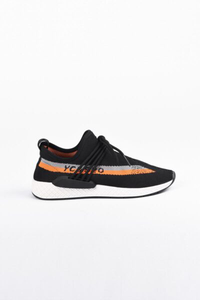

In [ ]:
#In ảnh từ link để ktra
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://360boutique.vn/wp-content/uploads/2018/08/G1011-750k-1-copy-Copy-400x600.jpg')
img = Image.open(BytesIO(response.content))
new_width  = 200
new_height = 300
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img

##**Lưu data dưới dạng dataframe**

In [ ]:
dataset= pd.read_csv('/content/x2.csv')
dataset.shape
data = dataset[['Name','Image','Price','PhanLoai','Quan jogger','Quan au','Ao thun nam','Ao khoac','Ao so mi','Ao hoodie' ]]

In [ ]:
data

Name  ... Ao hoodie
0      ÁO THUN U1ATN11102FOSHT  ...         0
1      ÁO THUN U1ATN12107FOSBA  ...         0
2      ÁO THUN U1ATN12106FOSBA  ...         0
3    QUẦN JEAN M1QJN12107FSFRI  ...         0
4    QUẦN JEAN M1QJN12106BSFTR  ...         0
..                         ...  ...       ...
386           SƠMI SMB049015GN  ...         0
387       SƠMI NAM SMB049012BL  ...         0
388       SOMI NAM SMB049001BL  ...         0
389           SOMI SMB039028BL  ...         0
390         SO MI NAM 088017BU  ...         0

[391 rows x 10 columns]

In [ ]:
#Lọc nhiễu
for i in range((len(data[['Price']]))):
       data['Price'][i]=data['Price'][i].replace(" ","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data['Price'][1]

'285000₫'

#19110315 - Trịnh Ngọc Hiến (Vẽ biểu đồ)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Hàm vẽ biểu đồ tròn
- title: Tiêu đề biểu đồ.
- Các mặt hàng: (tên) các sản phẩm.
- Dữ liệu: (data) của các sản phẩm.


In [ ]:
def ve_bieu_do_tron(title, cac_mat_hang, dulieu):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.axis('equal')
  cac_mat_hang = cac_mat_hang
  bieu_do = dulieu
  ax.pie(bieu_do, labels = cac_mat_hang, autopct='%0.2f%%')
  plt.title(title)
  plt.show()

##Hàm vẽ biểu đồ cột
- title: Tiêu đề biểu đồ.
- color: màu sắc của các cột thành phần.
- Các mặt hàng: (tên) các sản phẩm.
- Dữ liệu: (data) của các sản phẩm.
- xlabel: tên của cột X.
- ylabel: tên của cột Y.
- rotation: Độ xoay của các chú thích ở cột x

In [ ]:
#Hàm chú thích:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],horizontalalignment = 'center',fontsize = 14)

#Hàm vẽ biểu đồ cột
def ve_bieu_do_cot(title, colors, cac_mat_hang, dulieu, xlabel, ylabel, rotation):
  New_Colors = colors
  plt.bar(cac_mat_hang, dulieu, color=New_Colors)
  plt.title(title, fontsize=14)
  plt.xlabel(xlabel, fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  addlabels(cac_mat_hang,dulieu)
  plt.xticks(rotation = rotation)
  plt.show()

##Dữ liệu của 3 shop: Boutique Shop - ToTo Shop - Routine Shop 
- Boutique Shop (x1.csv)
- ToTo Shop (x2.csv)
- Routine Shop (x3.csv)

###Shop Boutique

####Xử lý dữ liệu từ file 'x1.csv'.

In [ ]:
data = 'x1.csv'
path = pd.read_csv(data)
df = pd.DataFrame(path)
df

Name  ... Ao hoodie
0    Quần jogger nam QGNTK208  ...         0
1           Giày nam GIATK230  ...         0
2           Giày nam GIATK229  ...         0
3           Giày nam GIATK228  ...         0
4       Áo khoác nam ABZTK203  ...         0
..                        ...  ...       ...
288     ÁO PHÔNG NAM APHTK056  ...         0
289     ÁO PHÔNG NAM APHTK025  ...         0
290   QUẦN SHORT NAM SKKTK010  ...         0
291   QUẦN SHORT NAM QSJCN011  ...         0
292      QUẦN ÂU NAM QAUTK012  ...         0

[293 rows x 11 columns]

In [ ]:
moving_column = df.pop('PhanLoai')
df.insert(1,'PhanLoai', moving_column)
df.head()

Name  PhanLoai  ... Ao so mi Ao hoodie
0  Quần jogger nam QGNTK208         1  ...        0         0
1         Giày nam GIATK230         2  ...        0         0
2         Giày nam GIATK229         2  ...        0         0
3         Giày nam GIATK228         2  ...        0         0
4     Áo khoác nam ABZTK203         0  ...        0         0

[5 rows x 11 columns]

In [ ]:
#Tạo cột Giá thành để loại bỏ "đ" trong price
df['GiaThanh'] = ''
df['GiaThanh'] = df['Price'].str[:-1]


#Đưa giá trị từ object về int
for i in range(len(df['GiaThanh'])):
  df['GiaThanh'][i]=df['Price'].str[:-1][i].replace(" ","")

for i in range(len(df['GiaThanh'])):
  df['GiaThanh'][i]=df['Price'].str[:-1][i].replace(".","")
 
#Ép kiểu cột Giá Thành thành int
df['GiaThanh'] = df['GiaThanh'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df.head()

Name  PhanLoai  ... Ao hoodie GiaThanh
0  Quần jogger nam QGNTK208         1  ...         0   450000
1         Giày nam GIATK230         2  ...         0   550000
2         Giày nam GIATK229         2  ...         0   790000
3         Giày nam GIATK228         2  ...         0   750000
4     Áo khoác nam ABZTK203         0  ...         0  1250000

[5 rows x 12 columns]

In [ ]:
print(df['GiaThanh'].dtype)


int64


####Tính số sản phẩm là Áo, Quần, hay SP khác.
0 là áo, 1 là quần, 2 là sản phẩm còn lại.

In [ ]:
count_ao = 0
for i in df['PhanLoai']:
  if i == 0:
    count_ao = count_ao+1

print('SL áo của dữ liệu: ',count_ao)

count_quan = 0
for i in df['PhanLoai']:
  if i == 1:
    count_quan = count_quan + 1

print('SL quần của dữ liệu: ',count_quan)

count_other = 0
for i in df['PhanLoai']:
  if i == 2:
    count_other = count_other + 1
  

print('SL các sản phẩm khác của dữ liệu: ',count_other)

sum = count_ao + count_quan + count_other
print(sum)

SL áo của dữ liệu:  207
SL quần của dữ liệu:  47
SL các sản phẩm khác của dữ liệu:  39
293


####Biểu đồ tròn về các mặt hàng chủ yếu của shop.

In [ ]:
#Tính % của Áo, Quần và các sản phẩm khác:

percent_ao_0 = (count_ao*100)/sum
print('% áo: ',percent_ao_0)

percent_quan_0 = (count_quan*100)/sum
print('% quần: ',percent_quan_0)

percent_other_0 = (count_other*100)/sum
print('% sp khác: ',percent_other_0)

% áo:  70.64846416382252
% quần:  16.040955631399317
% sp khác:  13.310580204778157


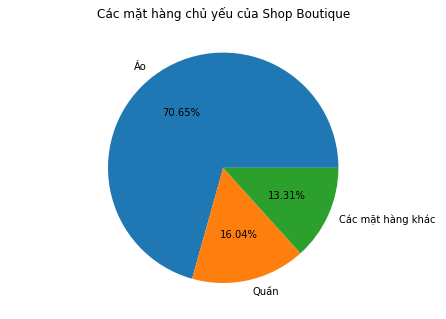

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

cac_mat_hang = ['Áo', 'Quần', 'Các mặt hàng khác']
title = 'Các mặt hàng chủ yếu của Shop Boutique'
dulieu = [percent_ao_0, percent_quan_0, percent_other_0]
ve_bieu_do_tron(title, cac_mat_hang, dulieu)

####Biểu đồ cột về số lượng các mặt hàng chủ yếu của Boutique Shop.

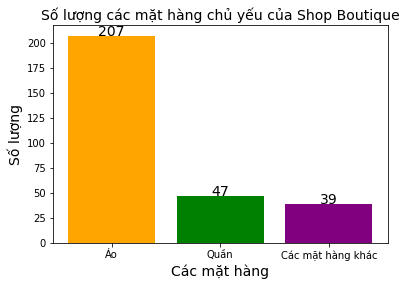

In [ ]:
#Biểu đồ cột về số lượng các mặt hàng chủ yếu của Boutique Shop:
sanpham = ['Áo', 'Quần', 'Các mặt hàng khác']
soluong = [count_ao, count_quan, count_other]
xlabel = 'Các mặt hàng'
ylabel = 'Số lượng'
title = 'Số lượng các mặt hàng chủ yếu của Shop Boutique'
colors = ['orange', 'green', 'purple']
rotate = 0

ve_bieu_do_cot(title, colors, sanpham, soluong, xlabel, ylabel,rotate)

####Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm.

In [ ]:
#Đếm số lượng sản phẩm của Boutique Shop trog các khoảng:

count_0 = 0 #Giá thành: 100k - 200k
count_1 = 0 #Giá thành: 200k - 300k
count_2 = 0 #Giá thành: 300k - 400k
count_3 = 0 #Giá thành: 400k - 500k
count_4 = 0 #Giá thành: 500k - 600k
count_5 = 0 #Giá thành: 600k - 700k
count_6 = 0 #Giá thành: 700k - 800k
count_7 = 0 #Giá thành: 800k - 900k
count_8 = 0 #Giá thành: 900k - 1000k
count_9 = 0 #Giá thành: 1000k trở lên
for i in df['GiaThanh']:
  if i > 0 and i < 200000:
    count_0 = count_0 + 1  
  if i >= 200000 and i < 300000:
    count_1 = count_1 + 1
  if i >= 300000 and i < 400000:
    count_2 = count_2 + 1
  if i >= 400000 and i < 500000:
    count_3 = count_3 + 1
  if i >= 500000 and i < 600000:
    count_4 = count_4 + 1
  if i >= 600000 and i < 700000:
    count_5 = count_5 + 1
  if i >= 700000 and i < 800000:
    count_6 = count_6 + 1
  if i >= 800000 and i < 900000:
    count_7 = count_7 + 1
  if i >= 900000 and i < 1000000:
    count_8 = count_8 + 1
  if i >= 1000000:
    count_9 = count_9 + 1
  
print(count_0)
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)
print(count_7)
print(count_8)
print(count_9)
sum = count_0 + count_1 + count_2 + count_3 + count_4 +\
      count_5 + count_6 + count_7 + count_8 + count_9
print(sum)
print('Giá thành cao nhất của shop: ',df['GiaThanh'].min())
print('Giá thành thấp nhất của shop: ', df['GiaThanh'].max())

4
57
92
56
30
17
15
9
5
8
293
Giá thành cao nhất của shop:  190000
Giá thành thấp nhất của shop:  1250000


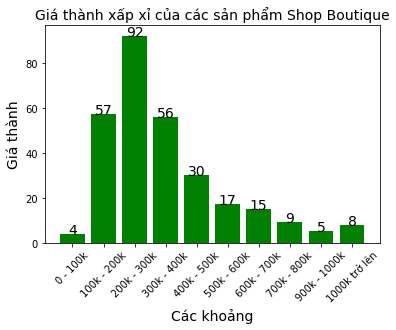

In [ ]:
#Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm:

giathanh = ['0 - 100k', '100k - 200k', '200k - 300k', '300k - 400k', 
            '400k - 500k', '500k - 600k', '600k - 700k', '700k - 800k',
            '900k - 1000k', '1000k trở lên']

khoang = [count_0, count_1, count_2, count_3, count_4, 
          count_5, count_6, count_7, count_8, count_9
          ]
          
title = 'Giá thành xấp xỉ của các sản phẩm Shop Boutique'
xlabel = 'Các khoảng'
ylabel = 'Giá thành'
colors = ['green']
rotate = 45


ve_bieu_do_cot(title, colors, giathanh, khoang, xlabel, ylabel, rotate)


####Thống kê về các mặt hàng là quần áo của Shop.

In [ ]:
#Đếm số sản phẩm là Quần Jogger
count_jogger = 0
df['Quan jogger']
for jogger in df['Quan jogger']:
  if jogger == 1:
   count_jogger = count_jogger + 1

print('SL quần jogger: ',count_jogger)

#Đếm số sản phẩm là Quần jean
count_jean = 0

for jean in df['Quan jean']:
  if jean == 1:
   count_jean = count_jean + 1

print('SL quần jean: ',count_jean)

#Đếm số sản phẩm là Quần âu
count_au = 0

for au in df['Quan au']:
  if au == 1:
   count_au = count_au + 1

print('SL quần âu: ',count_au)

#Đếm số sản phẩm là Áo thun nam:
count_aothun = 0

for aothun in df['Ao thun nam']:
  if aothun == 1:
   count_aothun = count_aothun + 1

print('SL áo thun: ',count_aothun)

#Đếm số sản phẩm là Áo khoác:
count_aokhoac = 0

for aokhoac in df['Ao khoac']:
  if aokhoac == 1:
   count_aokhoac = count_aokhoac + 1

print('SL áo khoác: ',count_aokhoac)

#Đếm số sản phẩm là Áo sơ mi:
count_somi = 0

for somi in df['Ao so mi']:
  if somi == 1:
   count_somi = count_somi + 1

print('SL áo sơ mi: ',count_somi)

#Đếm số sản phẩm là Áo hoodie:
count_hoodie = 0

for hoodie in df['Ao hoodie']:
  if hoodie == 1:
   count_hoodie = count_hoodie + 1

print('SL áo hoodie: ',count_hoodie)



SL quần jogger:  10
SL quần jean:  23
SL quần âu:  6
SL áo thun:  52
SL áo khoác:  35
SL áo sơ mi:  55
SL áo hoodie:  16


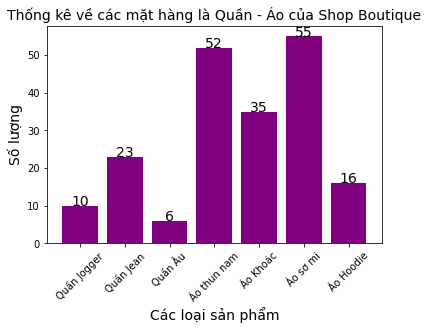

In [ ]:
#Thống kê về các mặt hàng là quần áo của Shop 

loai_sp = ['Quần Jogger', 'Quần Jean', 'Quần Âu', 
           'Áo thun nam', 'Áo Khoác', 'Áo sơ mi', 'Áo Hoodie'
           ]

soluong = [count_jogger, count_jean, count_au,
          count_aothun, count_aokhoac, count_somi, count_hoodie
          ]
colors = ['purple']
title = 'Thống kê về các mặt hàng là Quần - Áo của Shop Boutique'
xlabel = 'Các loại sản phẩm'
ylabel = 'Số lượng'
rotate = 45

ve_bieu_do_cot(title, colors, loai_sp, soluong, xlabel, ylabel, rotate)

###Shop ToTo

####Xử lý dữ liệu từ file 'x2.csv'.

In [ ]:
data1 = 'x2.csv'
path1 = pd.read_csv(data1)
df1 = pd.DataFrame(path1)
df1

Name  ... Ao hoodie
0      ÁO THUN U1ATN11102FOSHT  ...         0
1      ÁO THUN U1ATN12107FOSBA  ...         0
2      ÁO THUN U1ATN12106FOSBA  ...         0
3    QUẦN JEAN M1QJN12107FSFRI  ...         0
4    QUẦN JEAN M1QJN12106BSFTR  ...         0
..                         ...  ...       ...
386           SƠMI SMB049015GN  ...         0
387       SƠMI NAM SMB049012BL  ...         0
388       SOMI NAM SMB049001BL  ...         0
389           SOMI SMB039028BL  ...         0
390         SO MI NAM 088017BU  ...         0

[391 rows x 11 columns]

In [ ]:
moving_column = df1.pop('PhanLoai')
df1.insert(1,'PhanLoai', moving_column)
df1

Name  PhanLoai  ... Ao so mi Ao hoodie
0      ÁO THUN U1ATN11102FOSHT         0  ...        0         0
1      ÁO THUN U1ATN12107FOSBA         0  ...        0         0
2      ÁO THUN U1ATN12106FOSBA         0  ...        0         0
3    QUẦN JEAN M1QJN12107FSFRI         1  ...        0         0
4    QUẦN JEAN M1QJN12106BSFTR         1  ...        0         0
..                         ...       ...  ...      ...       ...
386           SƠMI SMB049015GN         0  ...        1         0
387       SƠMI NAM SMB049012BL         0  ...        1         0
388       SOMI NAM SMB049001BL         0  ...        1         0
389           SOMI SMB039028BL         0  ...        1         0
390         SO MI NAM 088017BU         0  ...        1         0

[391 rows x 11 columns]

In [ ]:
#Tạo cột Giá thành để loại bỏ "đ" trong price
#Xóa các dấu "." và khoảng cách trong cột Price
df1['GiaThanh'] = ''
df1['GiaThanh'] = df1['Price'].str[:-1]

#Đưa giá trị từ object về int
for i in range(len(df1['GiaThanh'])):
  df1['GiaThanh'][i]=df1['Price'].str[:-1][i].replace(" ","")

for i in range(len(df1['GiaThanh'])):
  df1['GiaThanh'][i]=df1['Price'].str[:-1][i].replace(".","")

#Ép kiểu cột Giá Thành thành int
df1['GiaThanh'] = df1['GiaThanh'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
print(df1['GiaThanh'].dtype)

int64


####Tính số sản phẩm là Áo, Quần, hay SP khác.
0 là áo, 1 là quần, 2 là sản phẩm còn lại.

In [ ]:
count_ao_1 = 0
for i in df1['PhanLoai']:
  if i == 0:
    count_ao_1 = count_ao_1 + 1

print('SL áo của dữ liệu: ',count_ao_1)

count_quan_1 = 0
for i in df1['PhanLoai']:
  if i == 1:
    count_quan_1 = count_quan_1 + 1

print('SL quần của dữ liệu: ',count_quan_1)

count_other_1 = 0
for i in df1['PhanLoai']:
  if i == 2:
    count_other_1 = count_other_1 + 1
  

print('SL các sản phẩm khác của dữ liệu: ',count_other_1)

sum = count_ao_1 + count_quan_1 + count_other_1
print(sum)

SL áo của dữ liệu:  174
SL quần của dữ liệu:  217
SL các sản phẩm khác của dữ liệu:  0
391


####Biểu đồ tròn về các mặt hàng chủ yếu của shop.

In [ ]:
#Tính % của Áo, Quần và các sản phẩm khác của ToTo Shop:

percent_ao_1 = (count_ao_1*100)/sum
print('% áo: ',percent_ao_1)

percent_quan_1 = (count_quan_1*100)/sum
print('% quần: ',percent_quan_1)

percent_other_1 = (count_other_1*100)/sum
print('% sp khác: ',percent_other_1)

% áo:  44.50127877237852
% quần:  55.49872122762148
% sp khác:  0.0


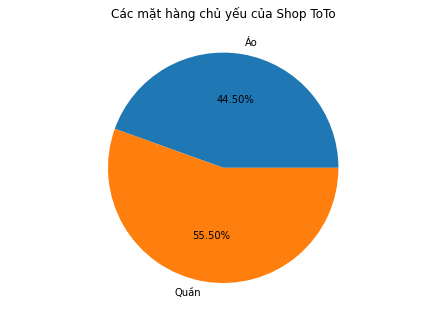

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

cac_mat_hang = ['Áo', 'Quần']
title = 'Các mặt hàng chủ yếu của Shop ToTo'
dulieu = [percent_ao_1, percent_quan_1]
ve_bieu_do_tron(title, cac_mat_hang, dulieu)

####Biểu đồ cột về số lượng các mặt hàng chủ yếu của shop.

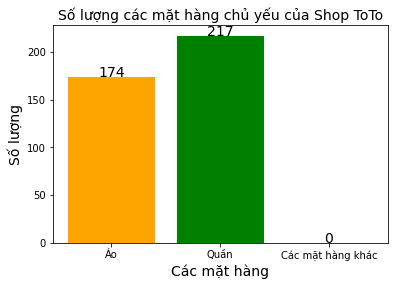

In [ ]:
#Biểu đồ cột về số lượng các mặt hàng chủ yếu của ToTo Shop:
sanpham = ['Áo', 'Quần', 'Các mặt hàng khác']
soluong = [count_ao_1, count_quan_1, count_other_1]
xlabel = 'Các mặt hàng'
ylabel = 'Số lượng'
title = 'Số lượng các mặt hàng chủ yếu của Shop ToTo'
colors = ['orange', 'green', 'purple']
rotate = 0

ve_bieu_do_cot(title, colors, sanpham, soluong, xlabel, ylabel,rotate)


####Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm.

In [ ]:
#Đếm giá thành sản phẩm của Boutique Shop trog các khoảng:

count_0 = 0 #Giá thành: 100k - 200k
count_1 = 0 #Giá thành: 200k - 300k
count_2 = 0 #Giá thành: 300k - 400k
count_3 = 0 #Giá thành: 400k - 500k
count_4 = 0 #Giá thành: 500k - 600k
count_5 = 0 #Giá thành: 600k - 700k
count_6 = 0 #Giá thành: 700k - 800k
count_7 = 0 #Giá thành: 800k - 900k
count_8 = 0 #Giá thành: 900k - 1000k
count_9 = 0 #Giá thành: 1000k trở lên
for i in df1['GiaThanh']:
  if i > 0 and i < 200000:
    count_0 = count_0 + 1  
  if i >= 200000 and i < 300000:
    count_1 = count_1 + 1
  if i >= 300000 and i < 400000:
    count_2 = count_2 + 1
  if i >= 400000 and i < 500000:
    count_3 = count_3 + 1
  if i >= 500000 and i < 600000:
    count_4 = count_4 + 1
  if i >= 600000 and i < 700000:
    count_5 = count_5 + 1
  if i >= 700000 and i < 800000:
    count_6 = count_6 + 1
  if i >= 800000 and i < 900000:
    count_7 = count_7 + 1
  if i >= 900000 and i < 1000000:
    count_8 = count_8 + 1
  if i >= 1000000:
    count_9 = count_9 + 1
  
print(count_0)
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)
print(count_7)
print(count_8)
print(count_9)
sum = count_0 + count_1 + count_2 + count_3 + count_4 +\
      count_5 + count_6 + count_7 + count_8 + count_9
print(sum)
print('Giá thành cao nhất của shop: ',df1['GiaThanh'].min())
print('Giá thành thấp nhất của shop: ', df1['GiaThanh'].max())

73
158
127
33
0
0
0
0
0
0
391
Giá thành cao nhất của shop:  118250
Giá thành thấp nhất của shop:  445000


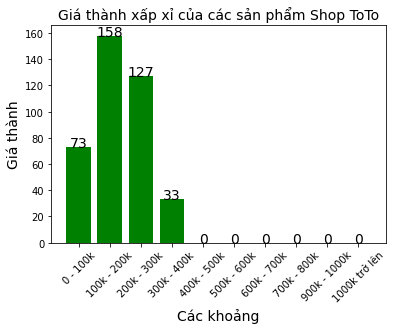

In [ ]:
#Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm:

giathanh = ['0 - 100k', '100k - 200k', '200k - 300k', '300k - 400k', 
            '400k - 500k', '500k - 600k', '600k - 700k', '700k - 800k',
            '900k - 1000k', '1000k trở lên']

khoang = [count_0, count_1, count_2, count_3, count_4, 
          count_5, count_6, count_7, count_8, count_9
          ]

title = 'Giá thành xấp xỉ của các sản phẩm Shop ToTo'
xlabel = 'Các khoảng'
ylabel = 'Giá thành'
colors = ['green']
rotate = 45

ve_bieu_do_cot(title, colors, giathanh, khoang, xlabel, ylabel, rotate)


####Thống kê về các mặt hàng là quần áo của Shop.

In [ ]:
#Đếm số sản phẩm là Quần Jogger
count_jogger_1 = 0
df['Quan jogger']
for jogger in df1['Quan jogger']:
  if jogger == 1:
   count_jogger_1 = count_jogger_1 + 1

print('SL quần jogger: ',count_jogger_1)

#Đếm số sản phẩm là Quần jean
count_jean_1 = 0

for jean in df1['Quan jean']:
  if jean == 1:
   count_jean_1 = count_jean_1 + 1

print('SL quần jeans: ',count_jean_1)

#Đếm số sản phẩm là Quần âu
count_au_1 = 0

for au in df1['Quan au']:
  if au == 1:
   count_au_1 = count_au_1 + 1

print('SL quần âu: ',count_au_1)

#Đếm số sản phẩm là Áo thun nam:
count_aothun_1 = 0

for aothun in df1['Ao thun nam']:
  if aothun == 1:
   count_aothun_1 = count_aothun_1 + 1

print('SL áo thun: ',count_aothun_1)

#Đếm số sản phẩm là Áo khoác:
count_aokhoac_1 = 0

for aokhoac in df1['Ao khoac']:
  if aokhoac == 1:
   count_aokhoac_1 = count_aokhoac_1 + 1

print('SL áo khoác: ',count_aokhoac_1)

#Đếm số sản phẩm là Áo sơ mi:
count_somi_1 = 0

for somi in df1['Ao so mi']:
  if somi == 1:
   count_somi_1 = count_somi_1 + 1

print('SL áo sơ mi: ',count_somi_1)

#Đếm số sản phẩm là Áo hoodie:
count_hoodie_1 = 0

for hoodie in df1['Ao hoodie']:
  if hoodie == 1:
   count_hoodie_1 = count_hoodie_1 + 1

print('SL áo hoodie: ',count_hoodie_1)


SL quần jogger:  27
SL quần jeans:  92
SL quần âu:  39
SL áo thun:  87
SL áo khoác:  0
SL áo sơ mi:  87
SL áo hoodie:  0


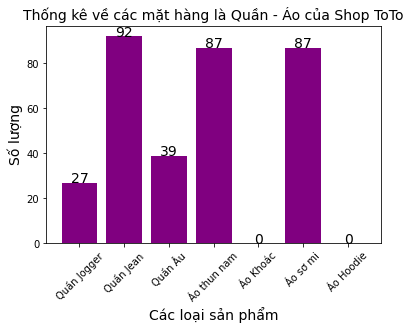

In [ ]:
#Thống kê về các mặt hàng là quần áo của Shop 

loai_sp = ['Quần Jogger', 'Quần Jean', 'Quần Âu', 
           'Áo thun nam', 'Áo Khoác', 'Áo sơ mi', 'Áo Hoodie'
           ]

soluong = [count_jogger_1, count_jean_1, count_au_1,
          count_aothun_1, count_aokhoac_1, count_somi_1, count_hoodie_1
          ]
colors = ['purple']
title = 'Thống kê về các mặt hàng là Quần - Áo của Shop ToTo'
xlabel = 'Các loại sản phẩm'
ylabel = 'Số lượng'
rotate = 45

ve_bieu_do_cot(title, colors, loai_sp, soluong, xlabel, ylabel, rotate)

###Shop Routine

####Xử lý dữ liệu từ file 'x3.csv'.

In [ ]:
data2 = 'x3.csv'
path2 = pd.read_csv(data2)
df2 = pd.DataFrame(path2)
df2

Name  ... Ao hoodie
0    Áo sơ mi tay ngắn có thêu LOOSE form - 10S21SH...  ...         0
1             Quần Jean trơn SLIM FIT  - 10F20DPA076R1  ...         0
2         Áo Khoác Chần Bông Cổ VREGULAR - 10F21JAC012  ...         0
3                   Áo Khoác CaroREGULAR - 10F21JAC019  ...         0
4       Áo Polo  Dệt Kim Tay NgắnSLIMFIT - 10F21POL013  ...         0
..                                                 ...  ...       ...
453  Áo sơ mi tay dài cổ trụ Fitted form - 10S20SHL045  ...         0
454  Áo sơ mi tay dài cổ trụ Viscose REGULAR form -...  ...         0
455  Áo sơ mi tay dài trơn MODAL FITTED form - 10S2...  ...         0
456  Áo sơ mi tay dài STRIPE REGULAR form - 10S20SH...  ...         0
457   Quần JEAN đen COTTON SLIM FIT form - 10S20DPA055  ...         0

[458 rows x 11 columns]

In [ ]:
moving_column = df2.pop('PhanLoai')
df2.insert(1,'PhanLoai', moving_column)
df2

Name  ...  Ao hoodie
0    Áo sơ mi tay ngắn có thêu LOOSE form - 10S21SH...  ...          0
1             Quần Jean trơn SLIM FIT  - 10F20DPA076R1  ...          0
2         Áo Khoác Chần Bông Cổ VREGULAR - 10F21JAC012  ...          0
3                   Áo Khoác CaroREGULAR - 10F21JAC019  ...          0
4       Áo Polo  Dệt Kim Tay NgắnSLIMFIT - 10F21POL013  ...          0
..                                                 ...  ...        ...
453  Áo sơ mi tay dài cổ trụ Fitted form - 10S20SHL045  ...          0
454  Áo sơ mi tay dài cổ trụ Viscose REGULAR form -...  ...          0
455  Áo sơ mi tay dài trơn MODAL FITTED form - 10S2...  ...          0
456  Áo sơ mi tay dài STRIPE REGULAR form - 10S20SH...  ...          0
457   Quần JEAN đen COTTON SLIM FIT form - 10S20DPA055  ...          0

[458 rows x 11 columns]

In [ ]:
#Tạo cột Giá thành để loại bỏ "đ" trong price
#Xóa các dấu "." và khoảng cách trong cột Price
df2['GiaThanh'] = ''
df2['GiaThanh'] = df2['Price'].str[:-1]

#Đưa giá trị từ object về int
for i in range(len(df2['GiaThanh'])):
  df2['GiaThanh'][i]=df2['Price'].str[:-1][i].replace(" ","")

for i in range(len(df2['GiaThanh'])):
  df2['GiaThanh'][i]=df2['Price'].str[:-1][i].replace(".","")

#Ép kiểu cột Giá Thành thành int
df2['GiaThanh'] = df2['GiaThanh'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
print(df2['GiaThanh'].dtype)

int64


####Tính số sản phẩm là Áo, Quần, hay SP khác.
0 là áo, 1 là quần, 2 là sản phẩm còn lại.

In [ ]:
count_ao_2 = 0
for i in df2['PhanLoai']:
  if i == 0:
    count_ao_2 = count_ao_2 + 1

print('SL áo của dữ liệu: ',count_ao_2)

count_quan_2 = 0
for i in df2['PhanLoai']:
  if i == 1:
    count_quan_2 = count_quan_2 + 1

print('SL quần của dữ liệu: ',count_quan_2)

count_other_2 = 0
for i in df2['PhanLoai']:
  if i == 2:
    count_other_2 = count_other_2 + 1
  

print('SL các sản phẩm khác của dữ liệu: ',count_other_2)

sum = count_ao_2 + count_quan_2 + count_other_2
print(sum)

SL áo của dữ liệu:  257
SL quần của dữ liệu:  115
SL các sản phẩm khác của dữ liệu:  86
458


####Biểu đồ tròn về các mặt hàng chủ yếu của shop.

In [ ]:
#Tính % của Áo, Quần và các sản phẩm khác của ToTo Shop:

percent_ao_2 = (count_ao_2*100)/sum
print('% áo: ',percent_ao_2)

percent_quan_2 = (count_quan_2*100)/sum
print('% quần: ',percent_quan_2)

percent_other_2 = (count_other_2*100)/sum
print('% sp khác: ',percent_other_2)

% áo:  56.11353711790393
% quần:  25.109170305676855
% sp khác:  18.777292576419214


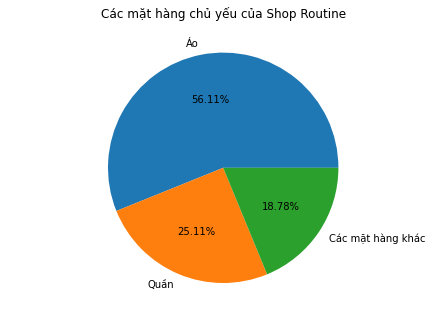

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

cac_mat_hang = ['Áo', 'Quần','Các mặt hàng khác']
title = 'Các mặt hàng chủ yếu của Shop Routine'
dulieu = [percent_ao_2, percent_quan_2, percent_other_2]
ve_bieu_do_tron(title, cac_mat_hang, dulieu)

####Biểu đồ cột về số lượng các mặt hàng chủ yếu của shop.

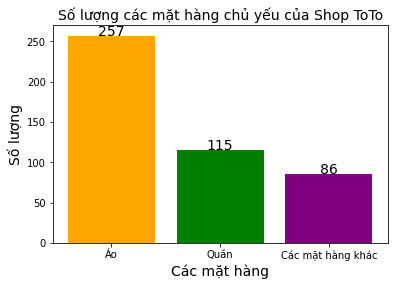

In [ ]:
#Biểu đồ cột về số lượng các mặt hàng chủ yếu của ToTo Shop:
sanpham = ['Áo', 'Quần', 'Các mặt hàng khác']
soluong = [count_ao_2, count_quan_2, count_other_2]
xlabel = 'Các mặt hàng'
ylabel = 'Số lượng'
title = 'Số lượng các mặt hàng chủ yếu của Shop ToTo'
colors = ['orange', 'green', 'purple']
rotate = 0

ve_bieu_do_cot(title, colors, sanpham, soluong, xlabel, ylabel,rotate)

####Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm.

In [ ]:
#Đếm số lượng sản phẩm của Boutique Shop trog các khoảng:

count_0 = 0 #Giá thành: 100k - 200k
count_1 = 0 #Giá thành: 200k - 300k
count_2 = 0 #Giá thành: 300k - 400k
count_3 = 0 #Giá thành: 400k - 500k
count_4 = 0 #Giá thành: 500k - 600k
count_5 = 0 #Giá thành: 600k - 700k
count_6 = 0 #Giá thành: 700k - 800k
count_7 = 0 #Giá thành: 800k - 900k
count_8 = 0 #Giá thành: 900k - 1000k
count_9 = 0 #Giá thành: 1000k trở lên
for i in df2['GiaThanh']:
  if i > 0 and i < 200000:
    count_0 = count_0 + 1  
  if i >= 200000 and i < 300000:
    count_1 = count_1 + 1
  if i >= 300000 and i < 400000:
    count_2 = count_2 + 1
  if i >= 400000 and i < 500000:
    count_3 = count_3 + 1
  if i >= 500000 and i < 600000:
    count_4 = count_4 + 1
  if i >= 600000 and i < 700000:
    count_5 = count_5 + 1
  if i >= 700000 and i < 800000:
    count_6 = count_6 + 1
  if i >= 800000 and i < 900000:
    count_7 = count_7 + 1
  if i >= 900000 and i < 1000000:
    count_8 = count_8 + 1
  if i >= 1000000:
    count_9 = count_9 + 1
  
print(count_0)
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)
print(count_7)
print(count_8)
print(count_9)
sum = count_0 + count_1 + count_2 + count_3 + count_4 +\
      count_5 + count_6 + count_7 + count_8 + count_9
print(sum)
print('Giá thành cao nhất của shop: ',df2['GiaThanh'].min())
print('Giá thành thấp nhất của shop: ', df2['GiaThanh'].max())

59
71
126
143
23
14
7
3
3
9
458
Giá thành cao nhất của shop:  35000
Giá thành thấp nhất của shop:  1450000


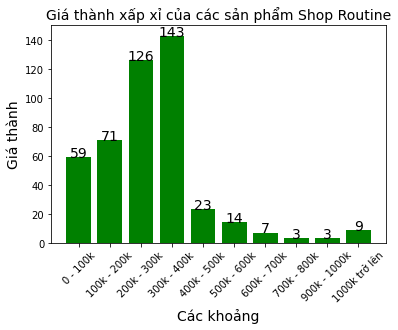

In [ ]:
#Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm:

giathanh = ['0 - 100k', '100k - 200k', '200k - 300k', '300k - 400k', 
            '400k - 500k', '500k - 600k', '600k - 700k', '700k - 800k',
            '900k - 1000k', '1000k trở lên']

khoang = [count_0, count_1, count_2, count_3, count_4, 
          count_5, count_6, count_7, count_8, count_9
          ]
          
title = 'Giá thành xấp xỉ của các sản phẩm Shop Routine'
xlabel = 'Các khoảng'
ylabel = 'Giá thành'
colors = ['green']
rotate = 45


ve_bieu_do_cot(title, colors, giathanh, khoang, xlabel, ylabel, rotate)

####Thống kê về các mặt hàng là quần áo của Shop.

In [ ]:
#Đếm số sản phẩm là Quần Jogger
count_jogger_2 = 0
df['Quan jogger']
for jogger in df2['Quan jogger']:
  if jogger == 1:
   count_jogger_2 = count_jogger_2 + 1

print('SL quần jogger: ',count_jogger_2)

#Đếm số sản phẩm là Quần jean
count_jean_2 = 0

for jean in df2['Quan jean']:
  if jean == 1:
   count_jean_2 = count_jean_2 + 1

print('SL quần jeans: ',count_jean_2)

#Đếm số sản phẩm là Quần âu
count_au_2 = 0

for au in df2['Quan au']:
  if au == 1:
   count_au_2 = count_au_2 + 1

print('SL quần âu: ',count_au_2)

#Đếm số sản phẩm là Áo thun nam:
count_aothun_2 = 0

for aothun in df2['Ao thun nam']:
  if aothun == 1:
   count_aothun_2 = count_aothun_2 + 1

print('SL áo thun: ',count_aothun_2)

#Đếm số sản phẩm là Áo khoác:
count_aokhoac_2 = 0

for aokhoac in df2['Ao khoac']:
  if aokhoac == 1:
   count_aokhoac_2 = count_aokhoac_2 + 1

print('SL áo khoác: ',count_aokhoac_2)

#Đếm số sản phẩm là Áo sơ mi:
count_somi_2 = 0

for somi in df2['Ao so mi']:
  if somi == 1:
   count_somi_2 = count_somi_2 + 1

print('SL áo sơ mi: ',count_somi_2)

#Đếm số sản phẩm là Áo hoodie:
count_hoodie_2 = 0

for hoodie in df2['Ao hoodie']:
  if hoodie == 1:
   count_hoodie_2 = count_hoodie_2 + 1

print('SL áo hoodie: ',count_hoodie_2)


SL quần jogger:  0
SL quần jeans:  52
SL quần âu:  0
SL áo thun:  115
SL áo khoác:  28
SL áo sơ mi:  105
SL áo hoodie:  1


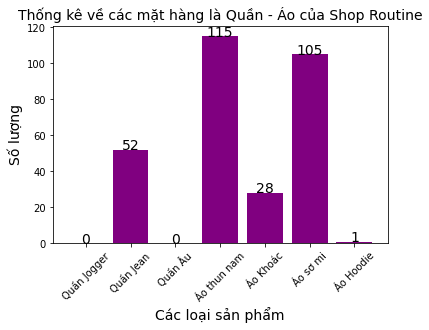

In [ ]:
loai_sp = ['Quần Jogger', 'Quần Jean', 'Quần Âu', 
           'Áo thun nam', 'Áo Khoác', 'Áo sơ mi', 'Áo Hoodie'
           ]

soluong = [count_jogger_2, count_jean_2, count_au_2,
          count_aothun_2, count_aokhoac_2, count_somi_2, count_hoodie_2
          ]
colors = ['purple']
title = 'Thống kê về các mặt hàng là Quần - Áo của Shop Routine'
xlabel = 'Các loại sản phẩm'
ylabel = 'Số lượng'
rotate = 45

ve_bieu_do_cot(title, colors, loai_sp, soluong, xlabel, ylabel, rotate)

#19110313 - Nguyễn Ngô Trung Hậu (Xuất ảnh và Kiểm Định)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from IPython.display import HTML
import glob
import random
import base64

##DATAFRAME CỦA CÁC SHOP



###SHOP BOUTIQUE

In [ ]:
data = 'x1.csv'
path = pd.read_csv(data)
df = pd.DataFrame(path)
df.head()

Name  ... Ao hoodie
0  Quần jogger nam QGNTK208  ...         0
1         Giày nam GIATK230  ...         0
2         Giày nam GIATK229  ...         0
3         Giày nam GIATK228  ...         0
4     Áo khoác nam ABZTK203  ...         0

[5 rows x 11 columns]

In [ ]:
df['Gia'] = ''
df['Gia'] = df['Price'].str[:-1]
for i  in range(len(df['Gia'])):
  df['Gia'][i]=df['Price'].str[:-1][i].replace(".","")
df['Gia'] = df['Gia'].astype(int)
df['Gia'].dtype
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name  ...      Gia
0  Quần jogger nam QGNTK208  ...   450000
1         Giày nam GIATK230  ...   550000
2         Giày nam GIATK229  ...   790000
3         Giày nam GIATK228  ...   750000
4     Áo khoác nam ABZTK203  ...  1250000

[5 rows x 12 columns]

###SHOP TOTO

In [ ]:
data1 = 'x2.csv'
path1 = pd.read_csv(data1)
df1 = pd.DataFrame(path1)
df1.head()

Name  ... Ao hoodie
0    ÁO THUN U1ATN11102FOSHT  ...         0
1    ÁO THUN U1ATN12107FOSBA  ...         0
2    ÁO THUN U1ATN12106FOSBA  ...         0
3  QUẦN JEAN M1QJN12107FSFRI  ...         0
4  QUẦN JEAN M1QJN12106BSFTR  ...         0

[5 rows x 11 columns]

In [ ]:
df1['Gia'] = ''
df1['Gia'] = df1['Price'].str[:-1]
for i  in range(len(df1['Gia'])):
  df1['Gia'][i]=df1['Price'].str[:-1][i].replace(".","")
df1['Gia'] = df1['Gia'].astype(int)
df1['Gia'].dtype
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name  ...     Gia
0    ÁO THUN U1ATN11102FOSHT  ...  285000
1    ÁO THUN U1ATN12107FOSBA  ...  285000
2    ÁO THUN U1ATN12106FOSBA  ...  285000
3  QUẦN JEAN M1QJN12107FSFRI  ...  385000
4  QUẦN JEAN M1QJN12106BSFTR  ...  385000

[5 rows x 12 columns]

###SHOP ROUTINE

In [ ]:
data2 = 'x3.csv'
path2 = pd.read_csv(data2)
df2 = pd.DataFrame(path2)
df2.head()

Name  ... Ao hoodie
0  Áo sơ mi tay ngắn có thêu LOOSE form - 10S21SH...  ...         0
1           Quần Jean trơn SLIM FIT  - 10F20DPA076R1  ...         0
2       Áo Khoác Chần Bông Cổ VREGULAR - 10F21JAC012  ...         0
3                 Áo Khoác CaroREGULAR - 10F21JAC019  ...         0
4     Áo Polo  Dệt Kim Tay NgắnSLIMFIT - 10F21POL013  ...         0

[5 rows x 11 columns]

In [ ]:
df2['Gia'] = ''
df2['Gia'] = df2['Price'].str[:-1]
for i  in range(len(df2['Gia'])):
  df2['Gia'][i]=df2['Price'].str[:-1][i].replace(".","")
df2['Gia'] = df2['Gia'].astype(int)
df2['Gia'].dtype
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name  ...     Gia
0  Áo sơ mi tay ngắn có thêu LOOSE form - 10S21SH...  ...  480000
1           Quần Jean trơn SLIM FIT  - 10F20DPA076R1  ...  312000
2       Áo Khoác Chần Bông Cổ VREGULAR - 10F21JAC012  ...  850000
3                 Áo Khoác CaroREGULAR - 10F21JAC019  ...  850000
4     Áo Polo  Dệt Kim Tay NgắnSLIMFIT - 10F21POL013  ...  480000

[5 rows x 12 columns]

##TÌM KHOẢNG TIN CẬY CHO TRUNG BÌNH CỦA DỮ LIỆU

In [ ]:
import statistics as sta
import numpy as np
import math
import scipy.stats
def mean_confidence_interval(data):
    #Tính độ dài của dữ liệu
    n=len(data)
    #Nhập độ lệch chuẩn tổng thể
    do_lech_chuan_tt=float(input("Nhap do lech chuan cua tong the(Neu chua biet do lech chuan cua tong the thi nhap 0): "))
    #Tính mean
    sample_mean=sta.mean(data)
    #Tính độ lệch chuẩn mẫu 
    do_lech_chuan=math.sqrt(sta.variance(data))
    #Nhập độ tin cậy cần tính
    confidence=int(input("Nhap do tin cay can tinh: "))
    alpha=1-(confidence/100)
    #Các trường hợp tính độ tin cậy
    #Trường hợp biết độ lệch chuẩn của tổng thể
    if do_lech_chuan_tt!=0:
        # Tính xác xuất giá trị nằm bên dưới  z-value trong phân phối chuẩn
        z=1-(alpha/2) 
        #Tinh z-value
        z_value=scipy.stats.norm.ppf(z)
        #Tính dung sai
        e=z_value*(do_lech_chuan_tt/math.sqrt(n))
        #Tính khoảng tin cậy
        confidence_interval=(sample_mean-e,sample_mean+e)
        #Trả về khoảng tin cậy
        print(confidence_interval)
    #Trường hợp chưa biết độ lệch chuẩn của tổng thể
    else:
        #Trường hợp mẫu lớn
        if n>30 or n==30:
            # Tính xác xuất giá trị nằm bên dưới  z-value trong phân phối chuan
            z=1-(alpha/2) 
            #Tinh z-value
            z_value=scipy.stats.norm.ppf(z)
            #Tính dung sai
            e=z_value*(do_lech_chuan/math.sqrt(n))
            #Tính khoảng tin cậy
            confidence_interval=(sample_mean-e,sample_mean+e)
            #Trả về khoảng tin cậy
            print(confidence_interval)
        #Trường hợp mẫu nhỏ
        else:
            #Tính bậc tự do 
            tu_do=n-1
            # Tính xác xuất giá trị nằm bên dưới  t-value trong phân phối t
            t=1-(alpha/2) 
            #Tinh z-value
            t_value=scipy.stats.t.ppf(t,tu_do)
            #Tính dung sai
            e=t_value*(do_lech_chuan/math.sqrt(n))
            #Tính khoảng tin cậy
            confidence_interval=(sample_mean-e,sample_mean+e)
            #Trả về khoảng tin cậy
            print(confidence_interval)

##TÌM KHOẢNG TIN CẬY CHO TRUNG BÌNH VỚI TRƯỜNG HỢP KHÔNG BIẾT ĐỘ LỆCH CHUẨN CỦA TỔNG THỂ VÀ KHOẢNG TIN CẬY 96%

###SHOP BOUTIQUE

In [ ]:
array=1.0*np.array(df['Gia'])
mean_confidence_interval(array)

Nhap do lech chuan cua tong the(Neu chua biet do lech chuan cua tong the thi nhap 0): 0
Nhap do tin cay can tinh: 96
(442430.1838556466, 490880.39634913154)


###SHOP TOTO

In [ ]:
array=1.0*np.array(df1['Gia'])
mean_confidence_interval(array)

Nhap do lech chuan cua tong the(Neu chua biet do lech chuan cua tong the thi nhap 0): 0
Nhap do tin cay can tinh: 96
(287480.67906243075, 304266.12400662294)


###SHOP ROUTINE

In [ ]:
array=1.0*np.array(df2['Gia'])
mean_confidence_interval(array)

Nhap do lech chuan cua tong the(Neu chua biet do lech chuan cua tong the thi nhap 0): 0
Nhap do tin cay can tinh: 96
(374522.25077552686, 411014.8671284033)


##IN ẢNH CỦA LOẠI QUẦN ÁO


###SHOP BOUTIQUE

In [ ]:
name_ao = []
name_quan = []
name_loaikhac = []
for i in range(0,50):
  if df['PhanLoai'][i] ==0:
    n = df['Name'][i]
    name_ao.append(n)
  if df['PhanLoai'][i] ==1:
    n = df['Name'][i]
    name_quan.append(n)
  if df['PhanLoai'][i] ==2:
    n = df['Name'][i]
    name_loaikhac.append(n)
print(name_ao)
print(name_quan)
print(name_loaikhac)

['Áo khoác nam ABZTK203', 'Áo sơ mi nam SKDTK253', 'Áo nỉ nam ANTTK214', 'Áo nỉ nam ANTTK213', 'Áo nỉ nam ANMTK215', 'Áo nỉ nam ANHTK216', 'Áo khoác nam AKHTK205', 'Áo khoác nam AKHCN206', 'Áo khoác nam AKBTK204', 'Áo hoodie nam AHTTK211', 'Áo khoác nam KNMTK202', 'Áo nỉ nam ANHTK211', 'Áo nỉ nam ANHTK210', 'Áo len nam ALETK203', 'Áo len nam ALETK202', 'Áo hoodie nam AHTTK215', 'Áo hoodie nam AHHTK214', 'Áo hoodie nam AHHTK210', 'Áo sơ mi nam STDTK247', 'Áo sơ mi nam STDTK242', 'Áo sơ mi nam SKDTK252', 'Áo sơ mi nam SKDTK250', 'Áo nỉ nam ANTTK212', 'Áo nỉ nam ANTTK209', 'Áo nỉ nam ANHTK208', 'Áo nỉ nam ANHTK207', 'Áo nỉ nam ANHTK116', 'Áo len nam ALECN205', 'Áo len nam ALECN204']
['Quần jogger nam QGNTK208', 'Quần jeans nam QJDTK235', 'Quần jeans nam QJDTK234', 'Quần jeans nam QJDTK233', 'Quần jeans nam QJDTK232', 'Quần jeans nam QJDTK231', 'Quần jeans nam QJDTK230', 'Quần jeans nam QJDTK228', 'Quần jeans nam QJDTK227', 'Quần jeans nam QJDTK226', 'Quần jeans nam QJDTK225', 'Quần jogger

In [ ]:
price_ao = []
price_quan = []
price_loaikhac = []
for i in range(0,50):
  if df['PhanLoai'][i] ==0:
    n = df['Price'][i]
    price_ao.append(n)
  if df['PhanLoai'][i] ==1:
    n = df['Price'][i]
    price_quan.append(n)
  if df['PhanLoai'][i] ==2:
    n = df['Price'][i]
    price_loaikhac.append(n)
print(price_ao)
print(price_quan)
print(price_loaikhac)

[' 1.250.000₫', ' 1.250.000₫', ' 399.000₫', ' 379.000₫', ' 399.000₫', ' 420.000₫', ' 950.000₫', ' 1.050.000₫', ' 550.000₫', ' 499.000₫', ' 499.000₫', ' 299.000₫', ' 399.000₫', ' 320.000₫', ' 349.000₫', ' 499.000₫', ' 499.000₫', ' 499.000₫', ' 395.000₫', ' 380.000₫', ' 1.050.000₫', ' 499.000₫', ' 390.000₫', ' 549.000₫', ' 380.000₫', ' 389.000₫', ' 350.000₫', ' 480.000₫', ' 489.000₫']
[' 450.000₫', ' 560.000₫', ' 520.000₫', ' 520.000₫', ' 550.000₫', ' 550.000₫', ' 550.000₫', ' 550.000₫', ' 520.000₫', ' 550.000₫', ' 450.000₫', ' 420.000₫', ' 490.000₫', ' 490.000₫', ' 360.000₫', ' 390.000₫', ' 420.000₫', ' 299.000₫']
[' 550.000₫', ' 790.000₫', ' 750.000₫']


In [ ]:
image_ao = []
image_quan = []
image_loaikhac = []

for i  in range(0,50) :
  if df['PhanLoai'][i] == 0:
    i = Image.open(requests.get(df['Image'][i], stream=True).raw)
    image_ao.append(i)
for i  in range(0,50) :
  if df['PhanLoai'][i] == 1:
    i = Image.open(requests.get(df['Image'][i], stream=True).raw)
    image_quan.append(i)
for i  in range(0,50) :
  if df['PhanLoai'][i] == 2:
    i = Image.open(requests.get(df['Image'][i], stream=True).raw)
    image_loaikhac.append(i)
print(image_ao)
print(image_quan)
print(image_loaikhac)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F70876E28D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F7087891D90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F7098F73A90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F70876E2F90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F708723C910>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F708723C990>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F70876E2B90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F708723C310>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F708723CE90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F70876E2990>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F708723CB50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F708723CBD0>, <PI

In [ ]:
ds_ao = {
    'name': name_ao,
    'image': image_ao,
    'price' : price_ao 
}
data_frame = pd.DataFrame(ds_ao)
display(data_frame)

name  ...        price
0    Áo khoác nam ABZTK203  ...   1.250.000₫
1    Áo sơ mi nam SKDTK253  ...   1.250.000₫
2       Áo nỉ nam ANTTK214  ...     399.000₫
3       Áo nỉ nam ANTTK213  ...     379.000₫
4       Áo nỉ nam ANMTK215  ...     399.000₫
5       Áo nỉ nam ANHTK216  ...     420.000₫
6    Áo khoác nam AKHTK205  ...     950.000₫
7    Áo khoác nam AKHCN206  ...   1.050.000₫
8    Áo khoác nam AKBTK204  ...     550.000₫
9   Áo hoodie nam AHTTK211  ...     499.000₫
10   Áo khoác nam KNMTK202  ...     499.000₫
11      Áo nỉ nam ANHTK211  ...     299.000₫
12      Áo nỉ nam ANHTK210  ...     399.000₫
13     Áo len nam ALETK203  ...     320.000₫
14     Áo len nam ALETK202  ...     349.000₫
15  Áo hoodie nam AHTTK215  ...     499.000₫
16  Áo hoodie nam AHHTK214  ...     499.000₫
17  Áo hoodie nam AHHTK210  ...     499.000₫
18   Áo sơ mi nam STDTK247  ...     395.000₫
19   Áo sơ mi nam STDTK242  ...     380.000₫
20   Áo sơ mi nam SKDTK252  ...   1.050.000₫
21   Áo sơ mi nam SKDTK250  ...     499.000₫
22      Áo nỉ nam ANTTK212  ...     390.000₫
23      Áo nỉ nam ANTTK209  ...     549.000₫
24      Áo nỉ nam ANHTK208  ...     380.000₫
25      Áo nỉ nam ANHTK207  ...     389.000₫
26      Áo nỉ nam ANHTK116  ...     350.000₫
27     Áo len nam ALECN205  ...     480.000₫
28     Áo len nam ALECN204  ...     489.000₫

[29 rows x 3 columns]

In [ ]:
ds_quan = {
    'name': name_quan,
    'image': image_quan,
    'price' : price_quan 
}
data_frame_1 = pd.DataFrame(ds_quan)
display(data_frame_1)

name  ...      price
0   Quần jogger nam QGNTK208  ...   450.000₫
1    Quần jeans nam QJDTK235  ...   560.000₫
2    Quần jeans nam QJDTK234  ...   520.000₫
3    Quần jeans nam QJDTK233  ...   520.000₫
4    Quần jeans nam QJDTK232  ...   550.000₫
5    Quần jeans nam QJDTK231  ...   550.000₫
6    Quần jeans nam QJDTK230  ...   550.000₫
7    Quần jeans nam QJDTK228  ...   550.000₫
8    Quần jeans nam QJDTK227  ...   520.000₫
9    Quần jeans nam QJDTK226  ...   550.000₫
10   Quần jeans nam QJDTK225  ...   450.000₫
11  Quần jogger nam QGNTK206  ...   420.000₫
12      QUẦN ÂU NAM QACTK206  ...   490.000₫
13      QUẦN ÂU NAM QACTK205  ...   490.000₫
14  Quần jogger nam QGGTK205  ...   360.000₫
15    QUẦN KAKI NAM QKLTK204  ...   390.000₫
16  Quần jogger nam QGNTK209  ...   420.000₫
17  Quần jogger nam QGNTK108  ...   299.000₫

[18 rows x 3 columns]

In [ ]:
ds_loaikhac = {
    'name': name_loaikhac,
    'image': image_loaikhac,
    'price' : price_loaikhac 
}
data_frame_2 = pd.DataFrame(ds_loaikhac)
display(data_frame_2)

name  ...      price
0  Giày nam GIATK230  ...   550.000₫
1  Giày nam GIATK229  ...   790.000₫
2  Giày nam GIATK228  ...   750.000₫

[3 rows x 3 columns]

In [ ]:
def image_base64(im):
  if isinstance(im, str):
    im = get_thumbnail(im)
  with BytesIO() as buffer:
    im.save(buffer, 'jpeg')
    return base64.b64encode(buffer.getvalue()).decode()
def image_formatter(im):
  return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


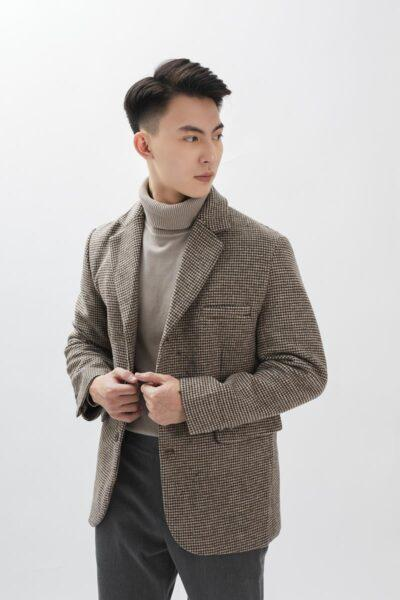
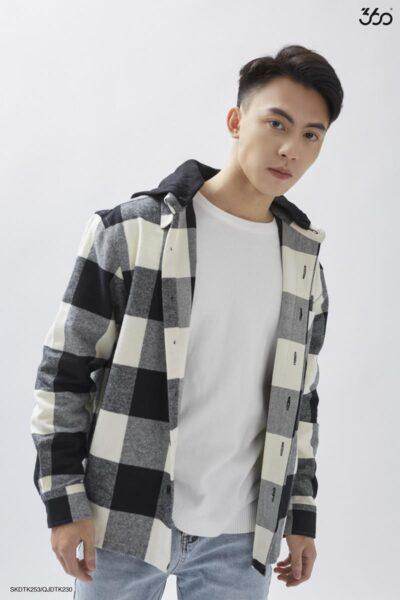
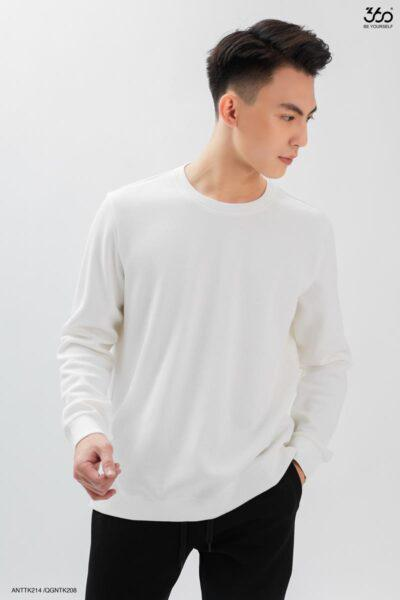
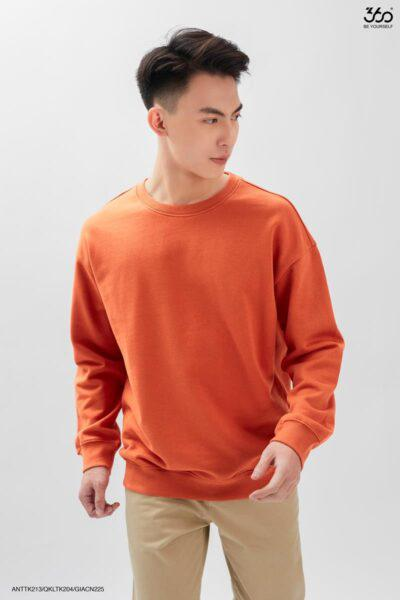
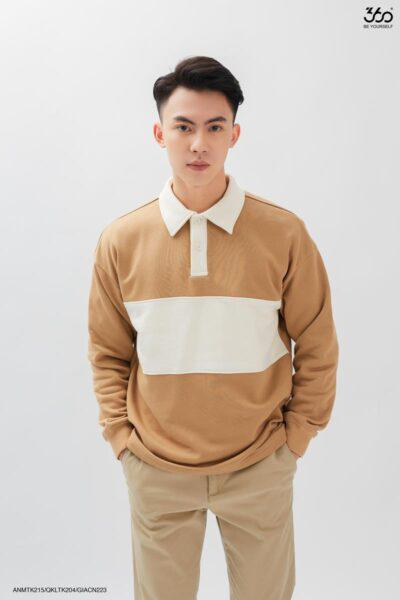
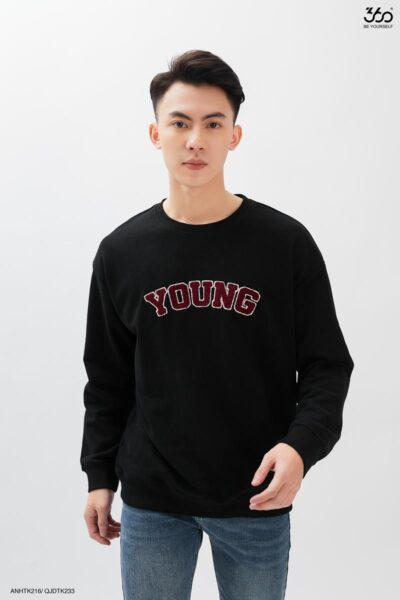
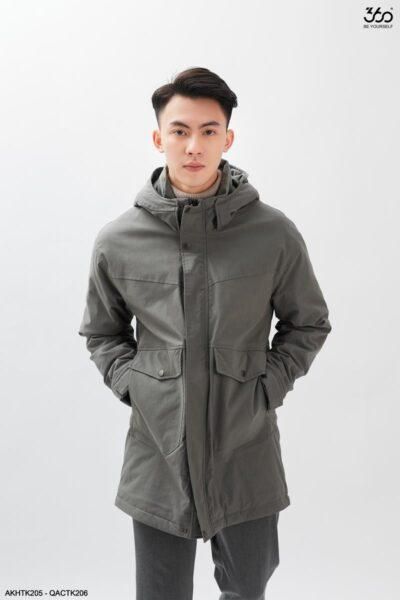
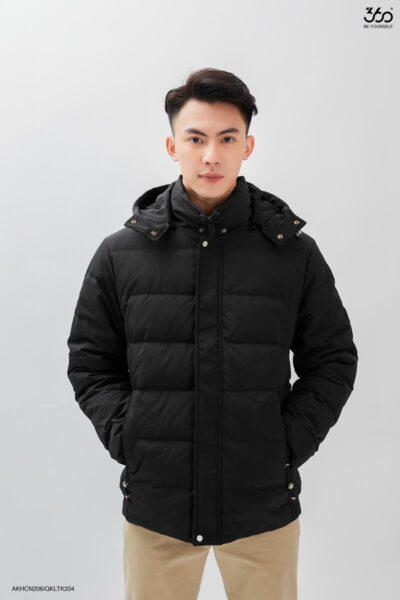
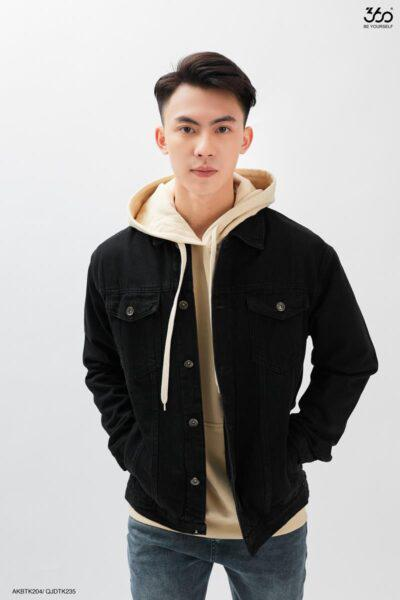
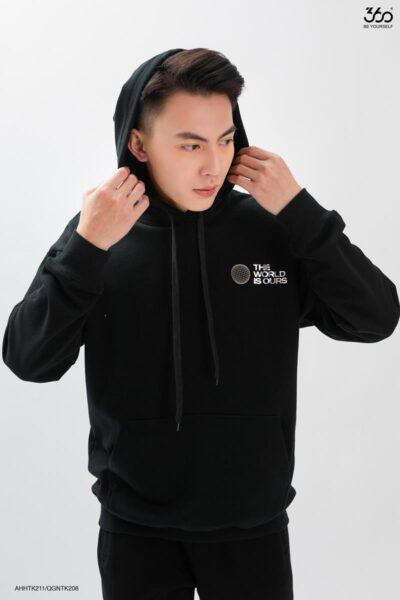
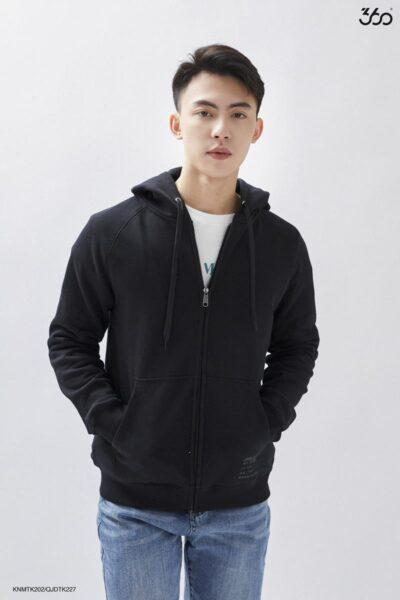
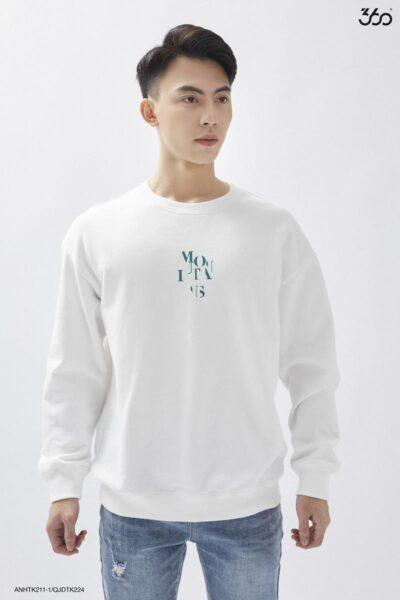
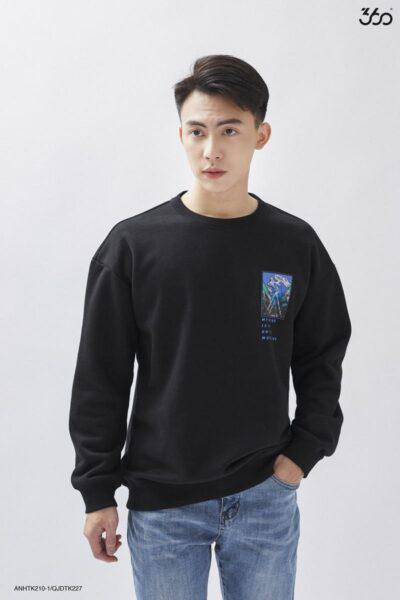
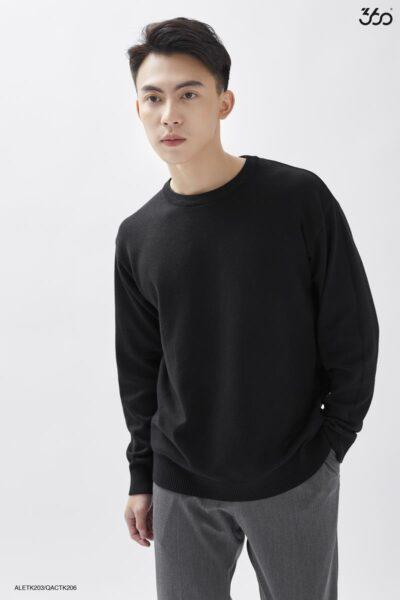
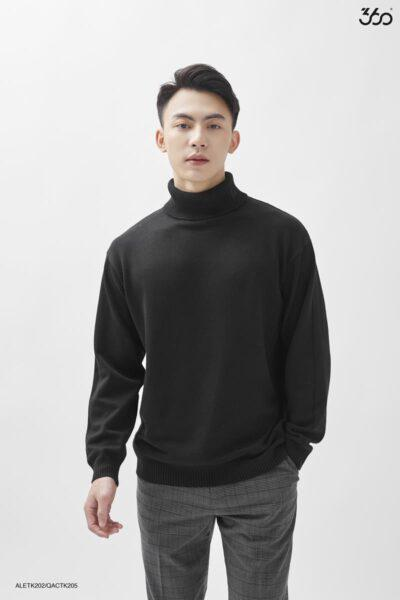
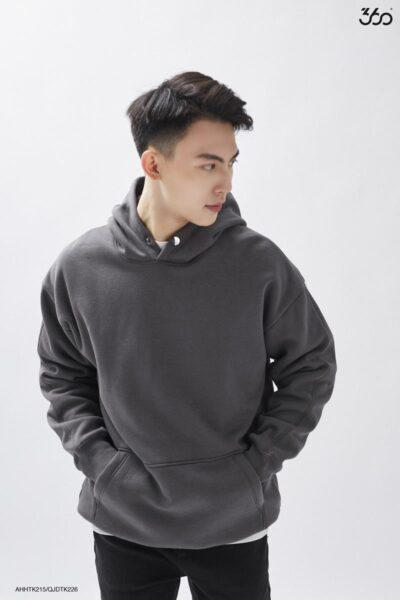
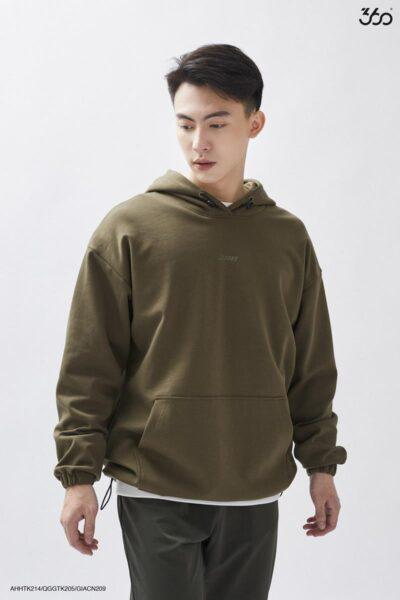
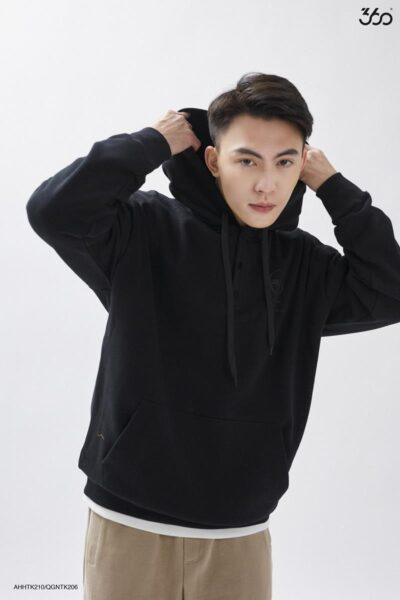
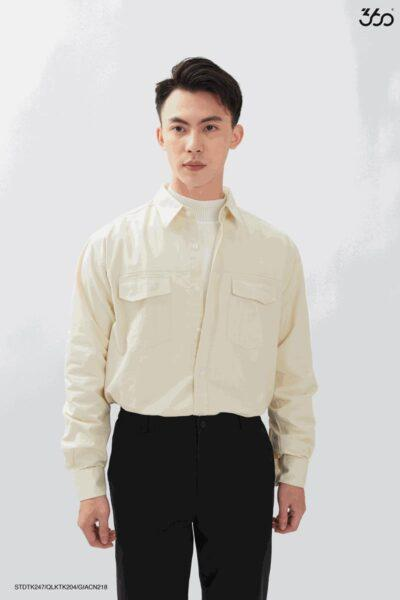
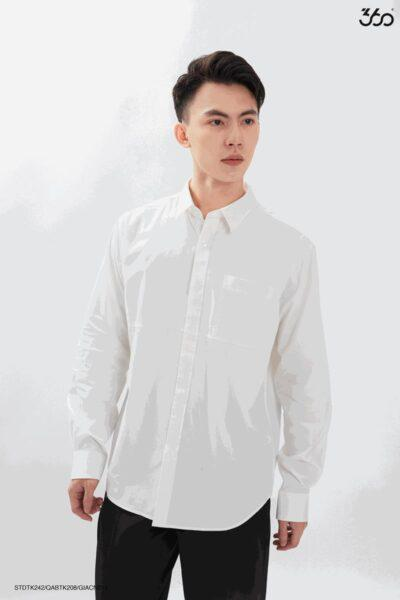
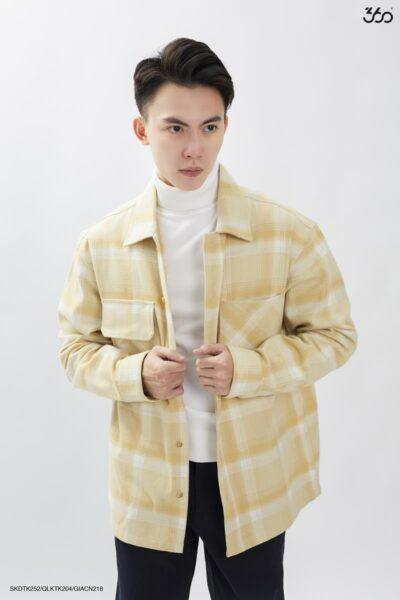
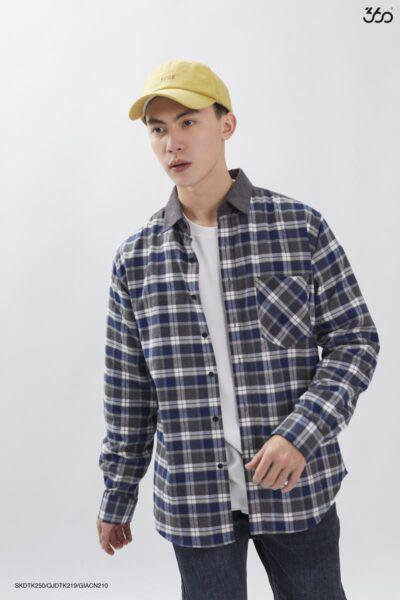
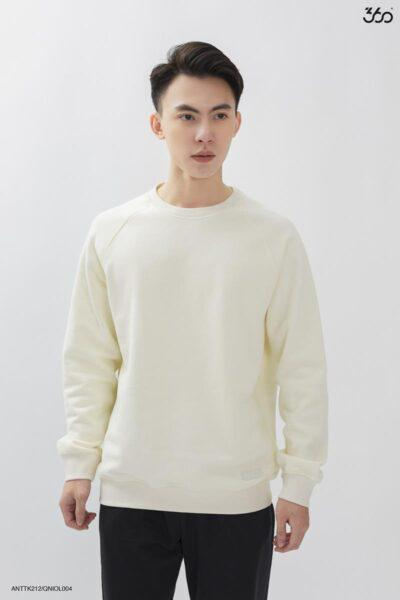
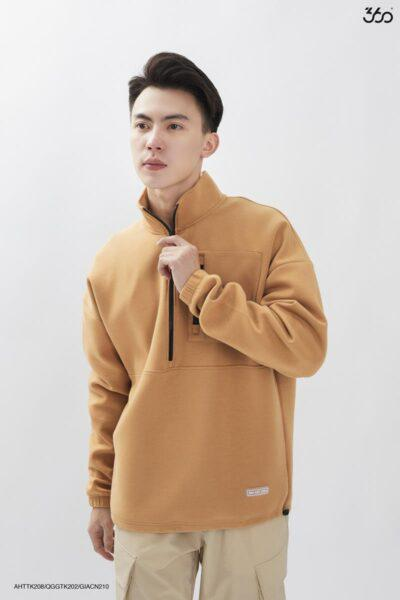
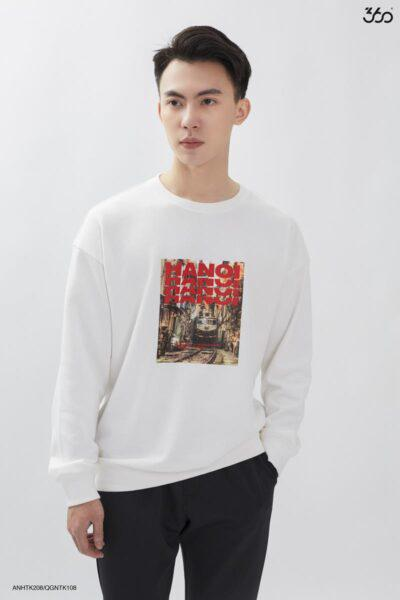
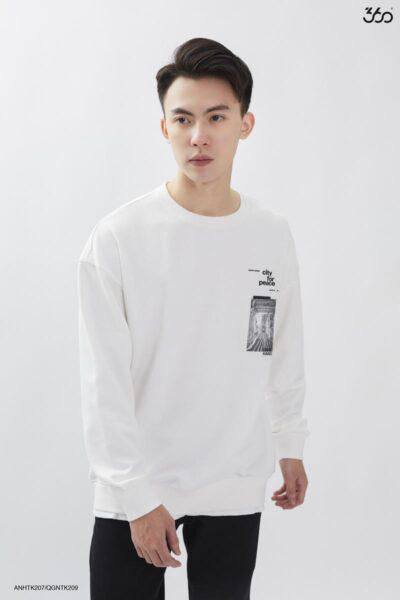
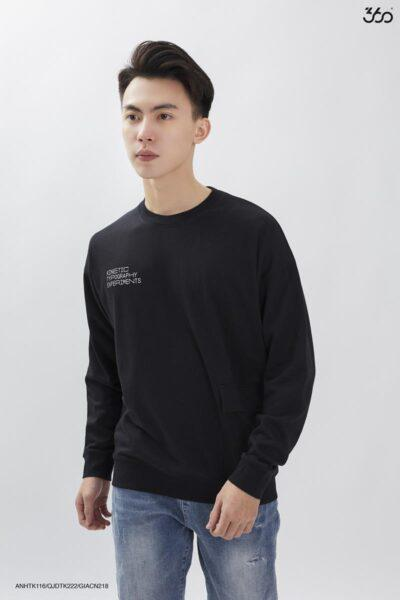
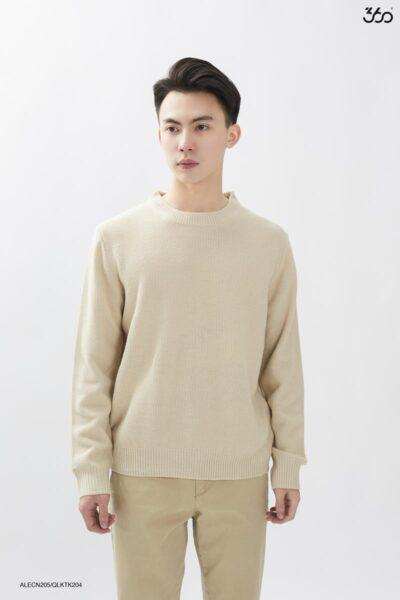
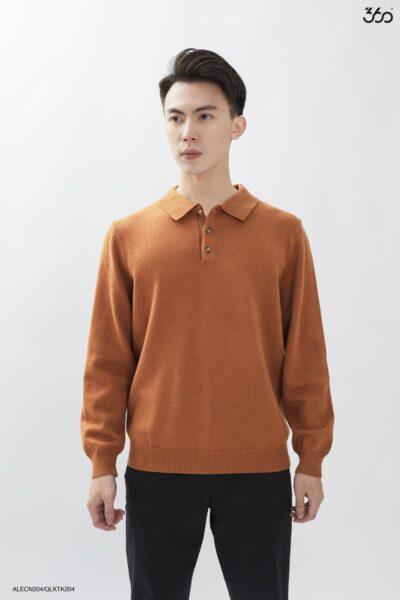

In [ ]:
HTML(data_frame[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))


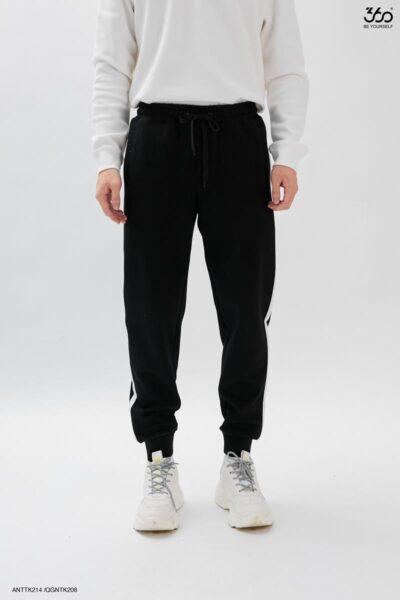
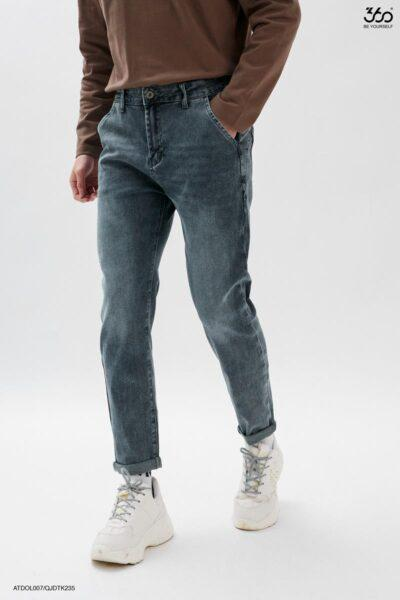
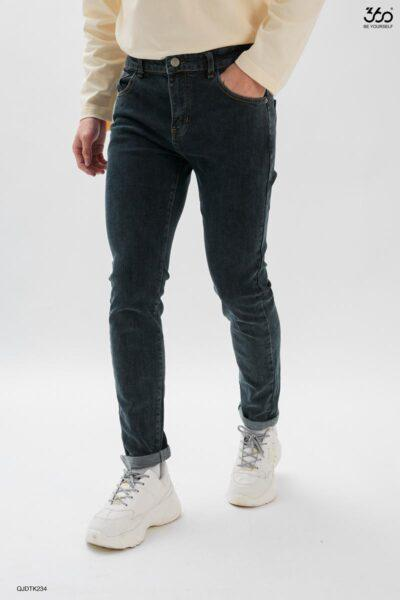
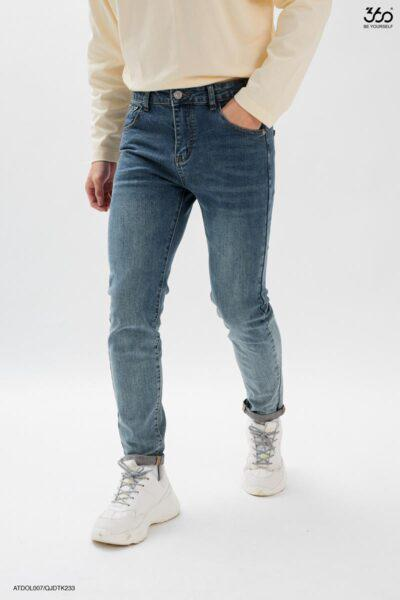
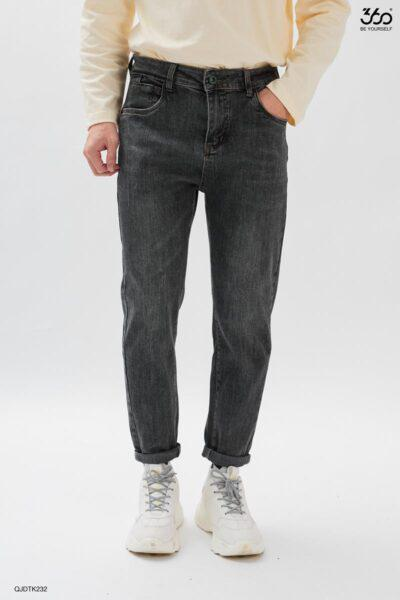
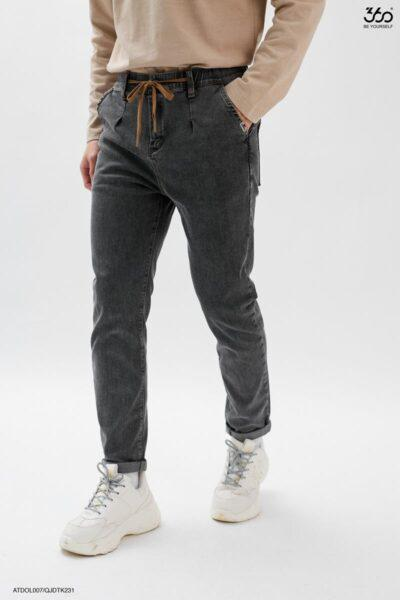
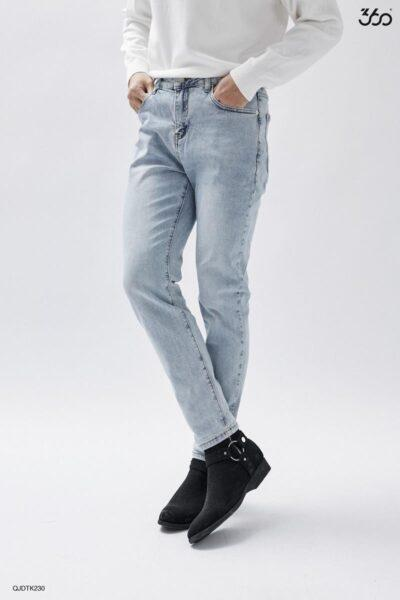
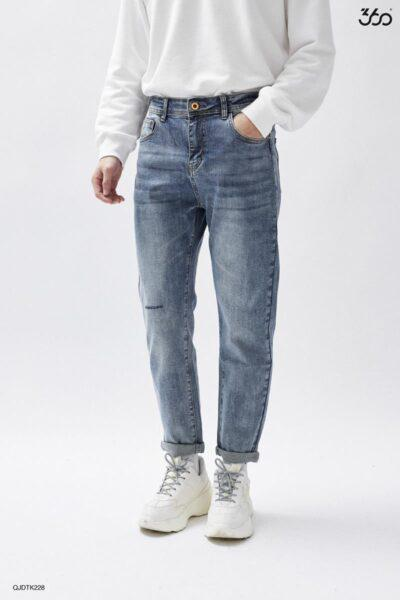
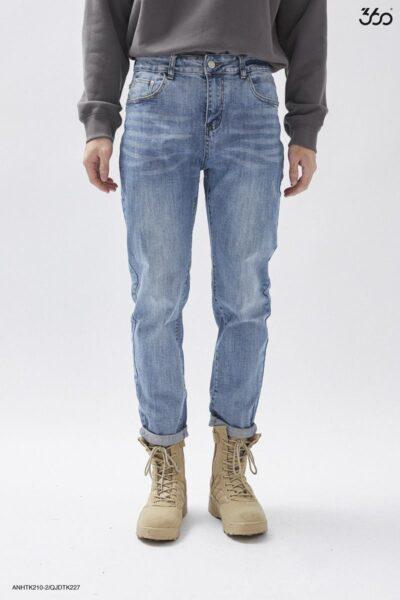
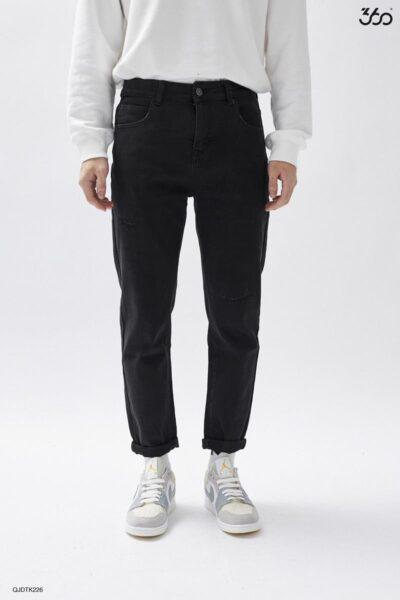
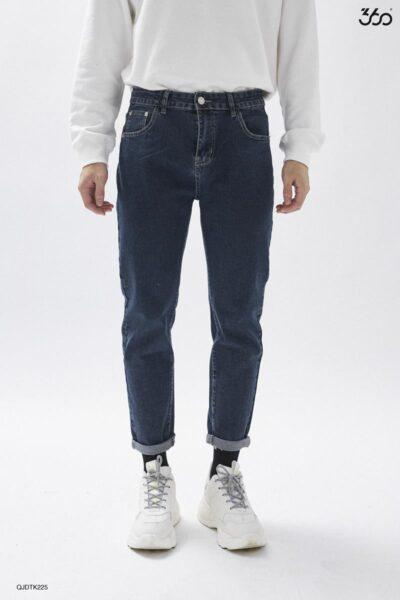
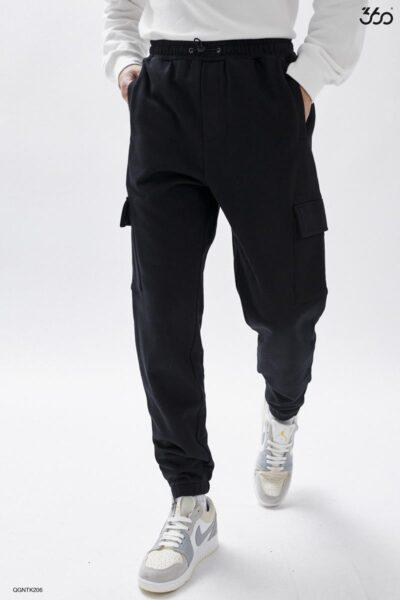
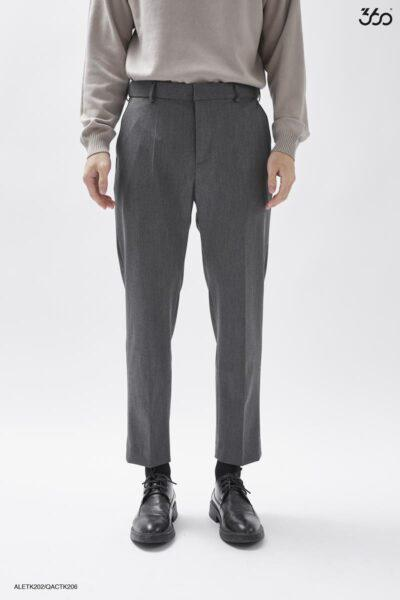
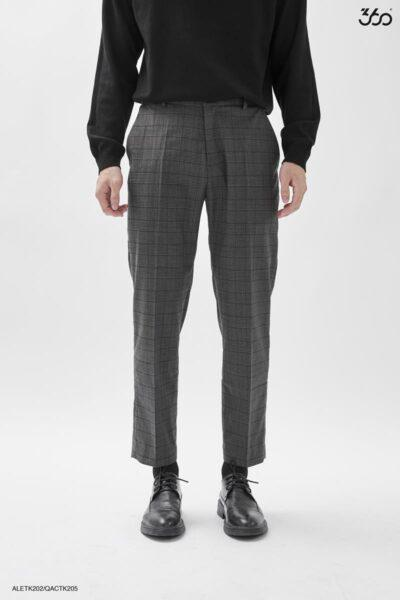
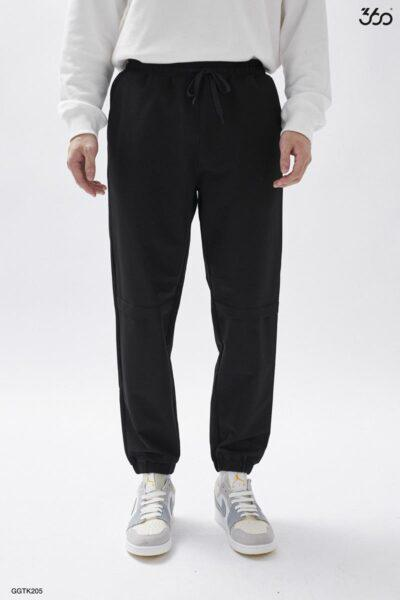
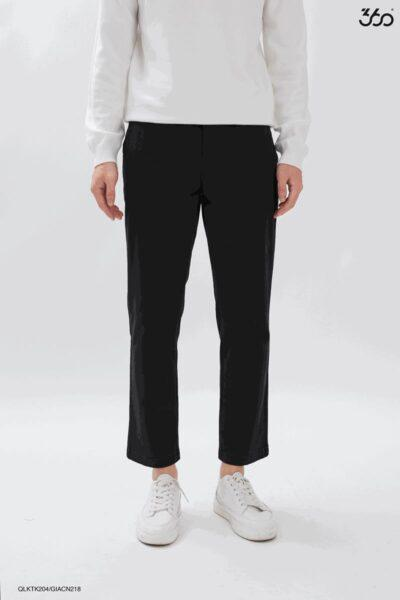
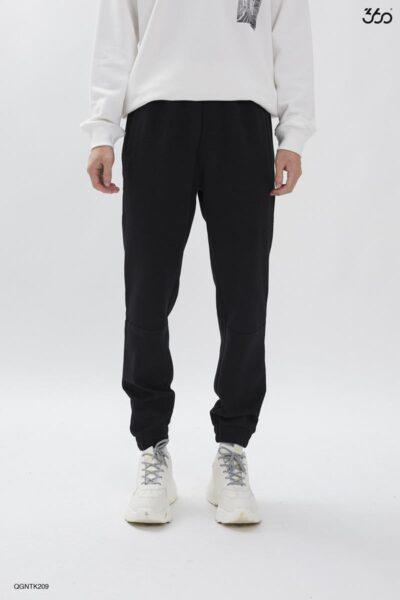
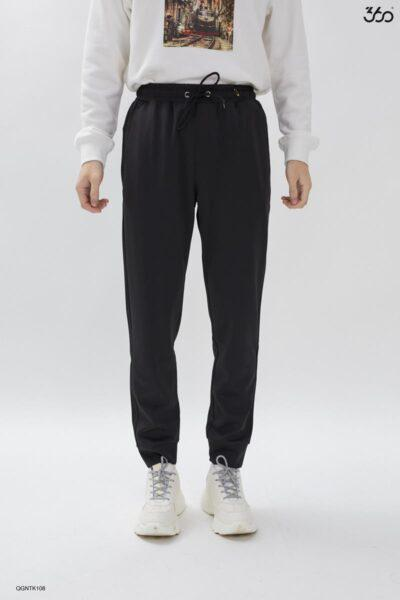

In [ ]:
HTML(data_frame_1[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))


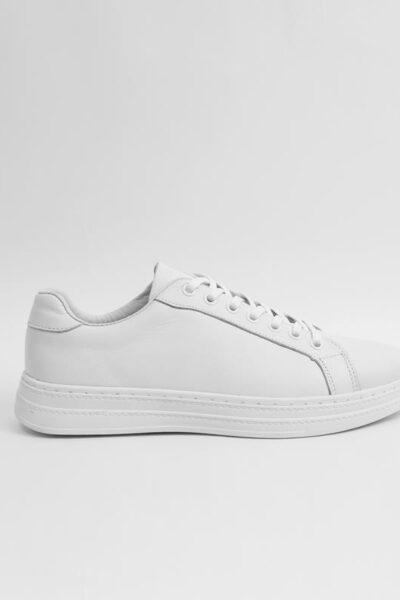
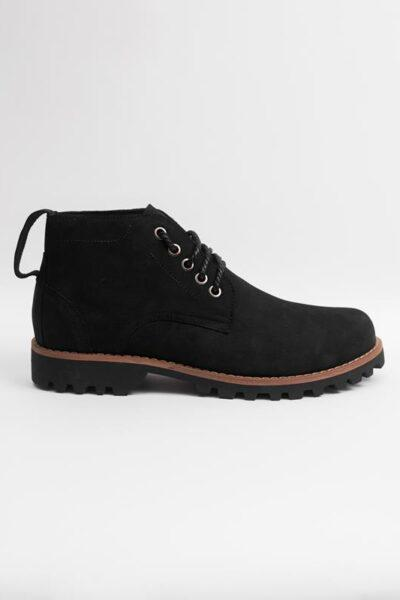
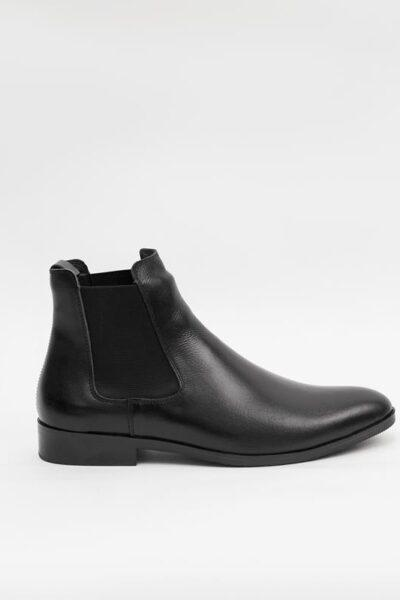

In [ ]:
HTML(data_frame_2[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))

###SHOP TOTO

In [ ]:
name_ao_1 = []
name_quan_1 = []
name_loaikhac_1 = []
for i in range(0,50):
  if df1['PhanLoai'][i] ==0:
    n = df1['Name'][i]
    name_ao_1.append(n)
  if df1['PhanLoai'][i] ==1:
    n = df1['Name'][i]
    name_quan_1.append(n)
  if df1['PhanLoai'][i] ==2:
    n = df1['Name'][i]
    name_loaikhac_1.append(n)
print(name_ao_1)
print(name_quan_1)
print(name_loaikhac_1)

['ÁO THUN U1ATN11102FOSHT', 'ÁO THUN U1ATN12107FOSBA', 'ÁO THUN U1ATN12106FOSBA', 'ÁO THUN U1ATN12105FOSHT', 'ÁO THUN U1ATN12104FOSBA', 'ÁO THUN U1ATN12103FOSBA', 'ÁO SƠMI M1SMD12101BOSTR', 'ÁO THUN U1ATN12102SOSHT', 'ÁO THUN U1ATN12101FOSHT', 'ÁO SƠMI M1SMN11106FOSHT', 'ÁO SƠMI M1SMN11105FOSHT', 'ÁO SƠMI M1SMN11104FOSHT', 'ÁO SƠMI M1SMN11103FOSHT', 'ÁO SƠMI M1SMN11102FOSHT', 'ÁO THUN U1ATN11104SOSHT', 'ÁO THUN U1ATN11103FOSBA', 'ÁO SƠMI M1SMD11103BOSTR', 'ÁO SƠMI M1SMD11102BOSTR', 'ÁO THUN U1ATN11101FOSHT', 'ÁO SƠMI M1SMN11101BOSBA', 'ÁO SƠMI M1SMD11101BOSBA']
['QUẦN JEAN M1QJN12107FSFRI', 'QUẦN JEAN M1QJN12106BSFTR', 'QUẦN JOGGER M1QJK12105FBGCR', 'QUẦN JOGGER M1QJK12104FBGCR', 'QUẦN JOGGER M1QJK12103FBGCR', 'QUẦN JOGGER M1QJK12102FBGCR', 'QUẦN JOGGER M1QJK12101FBGCR', 'QUẦN JEAN M1QJN12105FSFRI', 'QUẦN JEAN M1QJN12104FSFRI', 'QUẦN JOGGER M1QJJ12101FSFTR', 'QUẦN JEAN M1QJN12103SSFRI', 'QUẦN JEAN M1QJN12102FSFRI', 'QUẦN JEAN M1QJN12101BSFTR', 'QUẦN TÂY M1QTY11111BSFTR', 'QUẦN TÂY M1QT

In [ ]:
price_ao_1 = []
price_quan_1 = []
price_loaikhac_1 = []
for i in range(0,50):
  if df1['PhanLoai'][i] ==0:
    n = df1['Price'][i]
    price_ao_1.append(n)
  if df1['PhanLoai'][i] ==1:
    n = df1['Price'][i]
    price_quan_1.append(n)
  if df1['PhanLoai'][i] ==2:
    n = df1['Price'][i]
    price_loaikhac_1.append(n)
print(price_ao_1)
print(price_quan_1)
print(price_loaikhac_1)

[' 285000₫', ' 285000₫', ' 285000₫', ' 320000₫', ' 285000₫', ' 265000₫', ' 285000₫', ' 285000₫', ' 285000₫', ' 285000₫', ' 285000₫', ' 285000₫', ' 285000₫', ' 285000₫', ' 265000₫', ' 265000₫', ' 285000₫', ' 285000₫', ' 265000₫', ' 285000₫', ' 315000₫']
[' 385000₫', ' 385000₫', ' 315000₫', ' 315000₫', ' 315000₫', ' 315000₫', ' 315000₫', ' 415000₫', ' 415000₫', ' 420000₫', ' 425000₫', ' 395000₫', ' 395000₫', ' 385000₫', ' 385000₫', ' 385000₫', ' 385000₫', ' 385000₫', ' 385000₫', ' 365000₫', ' 365000₫', ' 365000₫', ' 345000₫', ' 325000₫', ' 315000₫', ' 395000₫', ' 425000₫', ' 415000₫', ' 415000₫']
[]


In [ ]:
image_ao_1 = []
image_quan_1 = []
image_loaikhac_1 = []

for i  in range(0,50) :
  if df1['PhanLoai'][i] == 0:
    i = Image.open(requests.get(df1['Image'][i], stream=True).raw)
    image_ao_1.append(i)
for i  in range(0,50) :
  if df1['PhanLoai'][i] == 1:
    i = Image.open(requests.get(df1['Image'][i], stream=True).raw)
    image_quan_1.append(i)
for i  in range(0,50) :
  if df1['PhanLoai'][i] == 2:
    i = Image.open(requests.get(df1['Image'][i], stream=True).raw)
    image_loaikhac_1.append(i)
print(image_ao_1)
print(image_quan_1)
print(image_loaikhac_1)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F70871E3790>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F708778F5D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F70878A87D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F70871F0C10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F708821B690>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F7087256910>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F70871E3AD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F708719CC90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F7087779D50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F708778FC10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F7087256BD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x525 at 0x7F70871F0E10>, <PI

In [ ]:
ds_ao_1 = {
    'name': name_ao_1,
    'image': image_ao_1,
    'price' : price_ao_1 
}
data_frame_toto = pd.DataFrame(ds_ao_1)
display(data_frame_toto)

name  ...     price
0   ÁO THUN U1ATN11102FOSHT  ...   285000₫
1   ÁO THUN U1ATN12107FOSBA  ...   285000₫
2   ÁO THUN U1ATN12106FOSBA  ...   285000₫
3   ÁO THUN U1ATN12105FOSHT  ...   320000₫
4   ÁO THUN U1ATN12104FOSBA  ...   285000₫
5   ÁO THUN U1ATN12103FOSBA  ...   265000₫
6   ÁO SƠMI M1SMD12101BOSTR  ...   285000₫
7   ÁO THUN U1ATN12102SOSHT  ...   285000₫
8   ÁO THUN U1ATN12101FOSHT  ...   285000₫
9   ÁO SƠMI M1SMN11106FOSHT  ...   285000₫
10  ÁO SƠMI M1SMN11105FOSHT  ...   285000₫
11  ÁO SƠMI M1SMN11104FOSHT  ...   285000₫
12  ÁO SƠMI M1SMN11103FOSHT  ...   285000₫
13  ÁO SƠMI M1SMN11102FOSHT  ...   285000₫
14  ÁO THUN U1ATN11104SOSHT  ...   265000₫
15  ÁO THUN U1ATN11103FOSBA  ...   265000₫
16  ÁO SƠMI M1SMD11103BOSTR  ...   285000₫
17  ÁO SƠMI M1SMD11102BOSTR  ...   285000₫
18  ÁO THUN U1ATN11101FOSHT  ...   265000₫
19  ÁO SƠMI M1SMN11101BOSBA  ...   285000₫
20  ÁO SƠMI M1SMD11101BOSBA  ...   315000₫

[21 rows x 3 columns]

In [ ]:
ds_quan_1 = {
    'name': name_quan_1,
    'image': image_quan_1,
    'price' : price_quan_1 
}
data_frame_toto_1 = pd.DataFrame(ds_quan_1)
display(data_frame_toto_1)

name  ...     price
0     QUẦN JEAN M1QJN12107FSFRI  ...   385000₫
1     QUẦN JEAN M1QJN12106BSFTR  ...   385000₫
2   QUẦN JOGGER M1QJK12105FBGCR  ...   315000₫
3   QUẦN JOGGER M1QJK12104FBGCR  ...   315000₫
4   QUẦN JOGGER M1QJK12103FBGCR  ...   315000₫
5   QUẦN JOGGER M1QJK12102FBGCR  ...   315000₫
6   QUẦN JOGGER M1QJK12101FBGCR  ...   315000₫
7     QUẦN JEAN M1QJN12105FSFRI  ...   415000₫
8     QUẦN JEAN M1QJN12104FSFRI  ...   415000₫
9   QUẦN JOGGER M1QJJ12101FSFTR  ...   420000₫
10    QUẦN JEAN M1QJN12103SSFRI  ...   425000₫
11    QUẦN JEAN M1QJN12102FSFRI  ...   395000₫
12    QUẦN JEAN M1QJN12101BSFTR  ...   395000₫
13     QUẦN TÂY M1QTY11111BSFTR  ...   385000₫
14     QUẦN TÂY M1QTY11110BSFTR  ...   385000₫
15     QUẦN TÂY M1QTY11109BSFTR  ...   385000₫
16     QUẦN TÂY M1QTY11108BSFTR  ...   385000₫
17     QUẦN TÂY M1QTY11107BSFTR  ...   385000₫
18     QUẦN TÂY M1QTY11106BSFTR  ...   385000₫
19     QUẦN TÂY M1QTY11104BSFTR  ...   365000₫
20     QUẦN TÂY M1QTY11103BSFTR  ...   365000₫
21     QUẦN TÂY M1QTY11102BSFTR  ...   365000₫
22     QUẦN TÂY M1QTY11101BSFTR  ...   345000₫
23    QUẦN KAKI M1QKK11101BSFTR  ...   325000₫
24   QUẦN SHORT M1SJN11101FSFRI  ...   315000₫
25    QUẦN JEAN M1QJN11104BSFTR  ...   395000₫
26    QUẦN JEAN M1QJN11103FSFRI  ...   425000₫
27    QUẦN JEAN M1QJN11102BSFRI  ...   415000₫
28    QUẦN JEAN M1QJN11101FSFRI  ...   415000₫

[29 rows x 3 columns]

In [ ]:
ds_loaikhac_1 = {
    'name': name_loaikhac_1,
    'image': image_loaikhac_1,
    'price' : price_loaikhac_1 
}
data_frame_toto_2 = pd.DataFrame(ds_loaikhac_1)
display(data_frame_toto_1)

name  ...     price
0     QUẦN JEAN M1QJN12107FSFRI  ...   385000₫
1     QUẦN JEAN M1QJN12106BSFTR  ...   385000₫
2   QUẦN JOGGER M1QJK12105FBGCR  ...   315000₫
3   QUẦN JOGGER M1QJK12104FBGCR  ...   315000₫
4   QUẦN JOGGER M1QJK12103FBGCR  ...   315000₫
5   QUẦN JOGGER M1QJK12102FBGCR  ...   315000₫
6   QUẦN JOGGER M1QJK12101FBGCR  ...   315000₫
7     QUẦN JEAN M1QJN12105FSFRI  ...   415000₫
8     QUẦN JEAN M1QJN12104FSFRI  ...   415000₫
9   QUẦN JOGGER M1QJJ12101FSFTR  ...   420000₫
10    QUẦN JEAN M1QJN12103SSFRI  ...   425000₫
11    QUẦN JEAN M1QJN12102FSFRI  ...   395000₫
12    QUẦN JEAN M1QJN12101BSFTR  ...   395000₫
13     QUẦN TÂY M1QTY11111BSFTR  ...   385000₫
14     QUẦN TÂY M1QTY11110BSFTR  ...   385000₫
15     QUẦN TÂY M1QTY11109BSFTR  ...   385000₫
16     QUẦN TÂY M1QTY11108BSFTR  ...   385000₫
17     QUẦN TÂY M1QTY11107BSFTR  ...   385000₫
18     QUẦN TÂY M1QTY11106BSFTR  ...   385000₫
19     QUẦN TÂY M1QTY11104BSFTR  ...   365000₫
20     QUẦN TÂY M1QTY11103BSFTR  ...   365000₫
21     QUẦN TÂY M1QTY11102BSFTR  ...   365000₫
22     QUẦN TÂY M1QTY11101BSFTR  ...   345000₫
23    QUẦN KAKI M1QKK11101BSFTR  ...   325000₫
24   QUẦN SHORT M1SJN11101FSFRI  ...   315000₫
25    QUẦN JEAN M1QJN11104BSFTR  ...   395000₫
26    QUẦN JEAN M1QJN11103FSFRI  ...   425000₫
27    QUẦN JEAN M1QJN11102BSFRI  ...   415000₫
28    QUẦN JEAN M1QJN11101FSFRI  ...   415000₫

[29 rows x 3 columns]


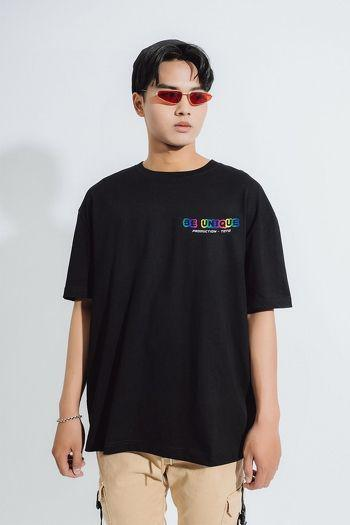
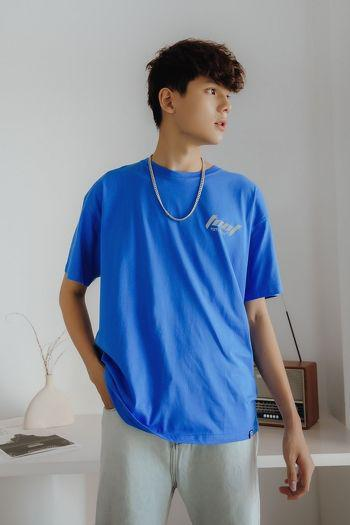
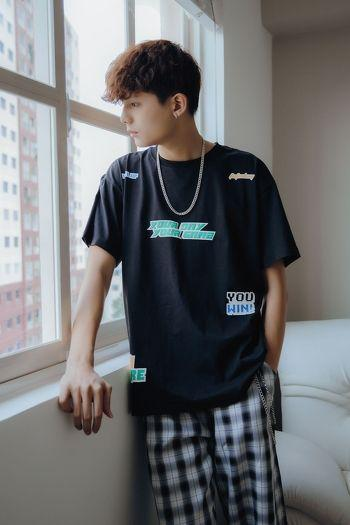
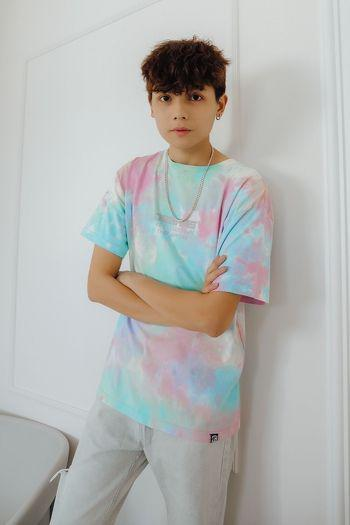
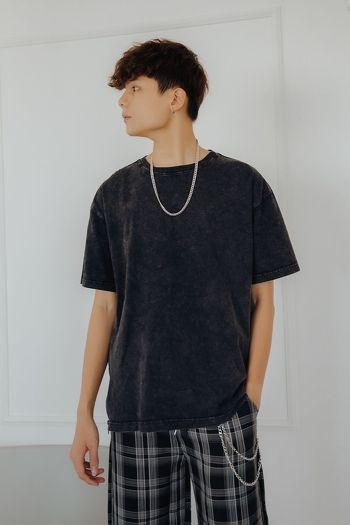
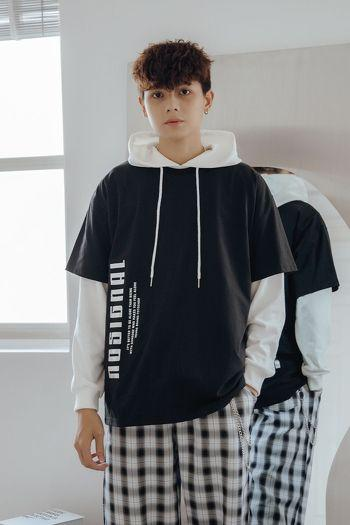
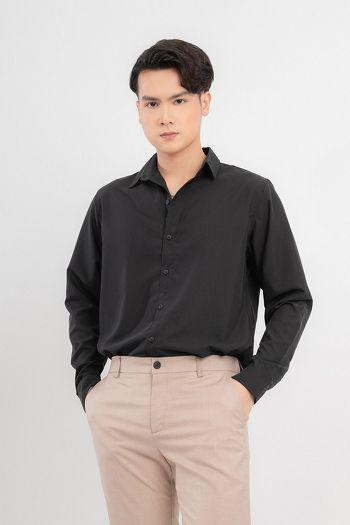
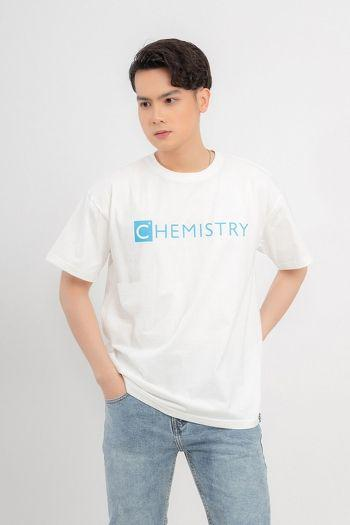
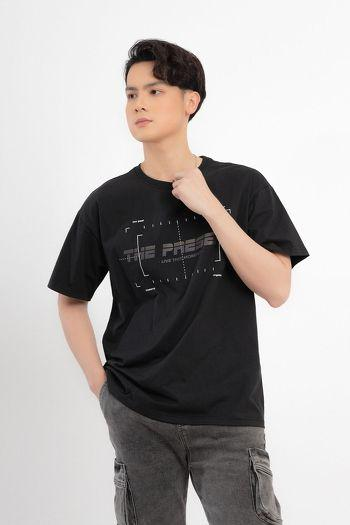
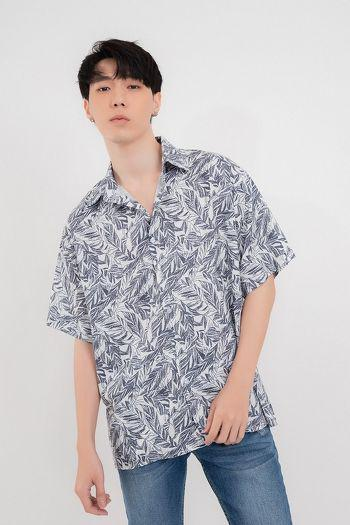
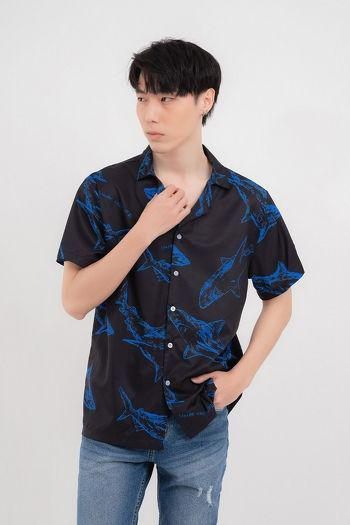
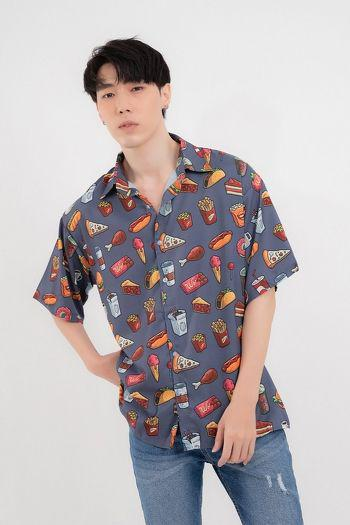
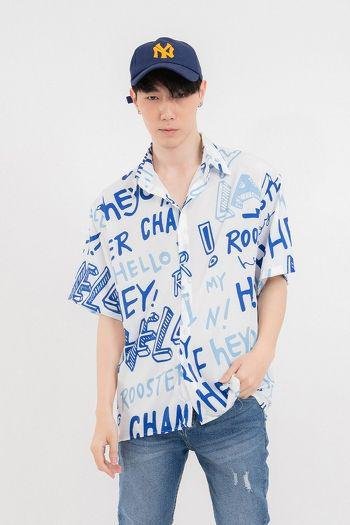
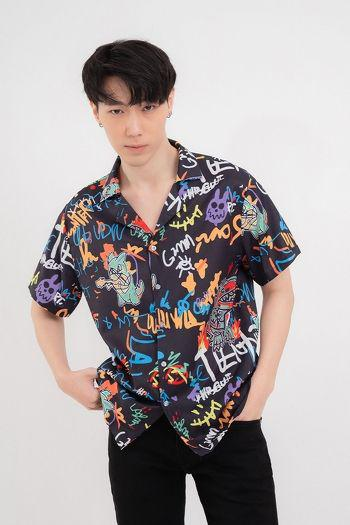
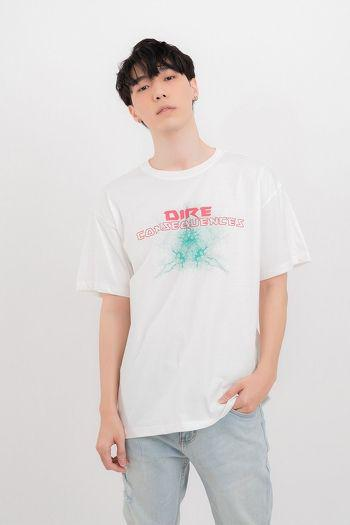
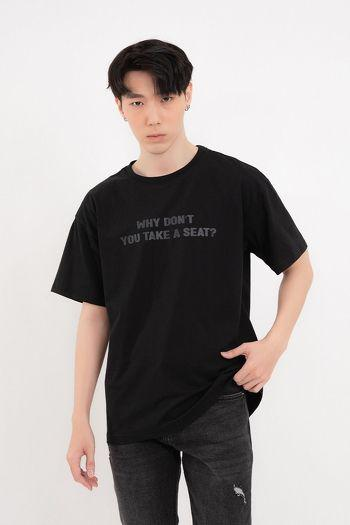
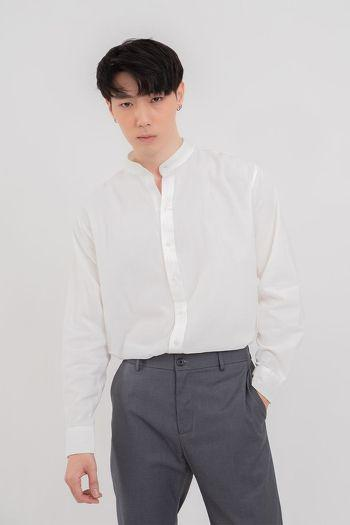
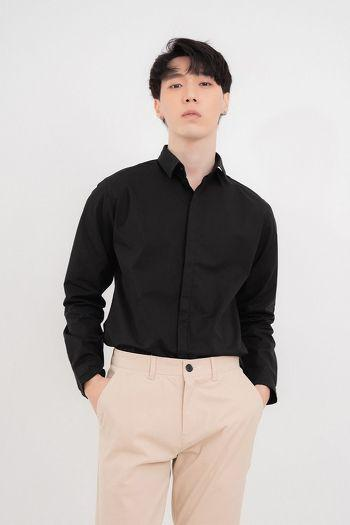
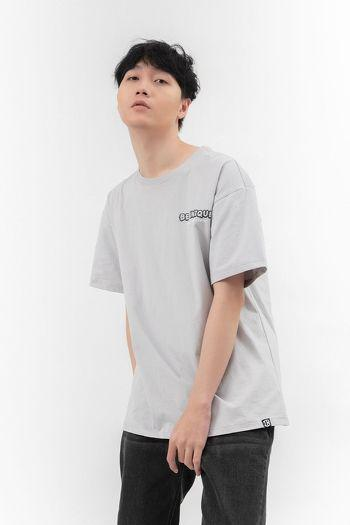
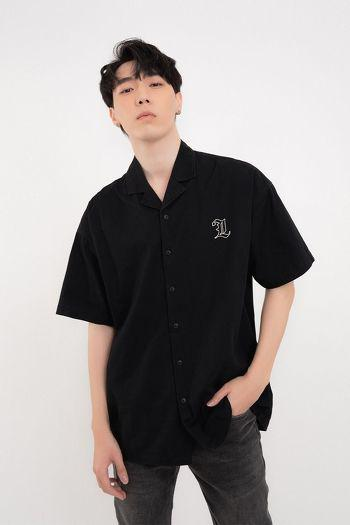
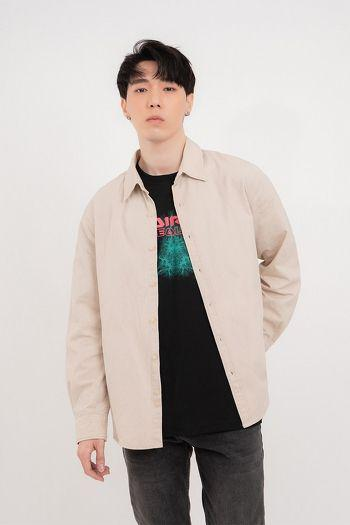

In [ ]:
HTML(data_frame_toto[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))


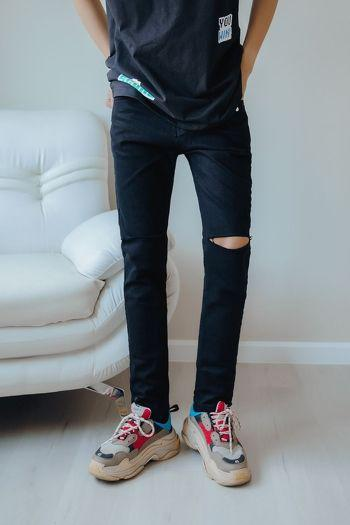
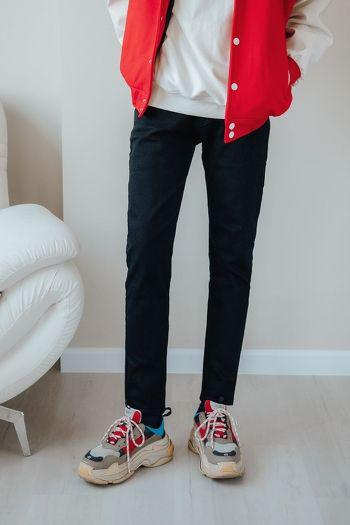
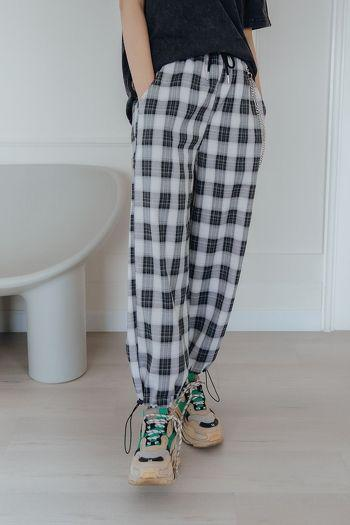
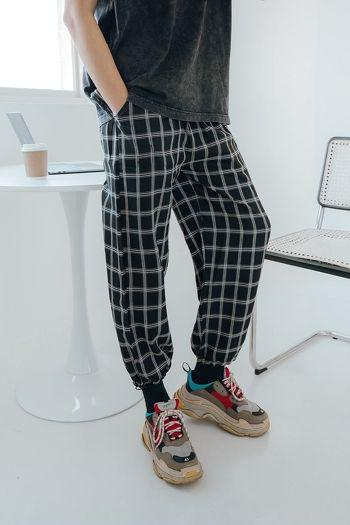
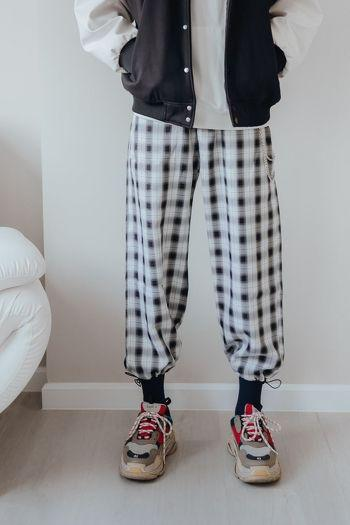
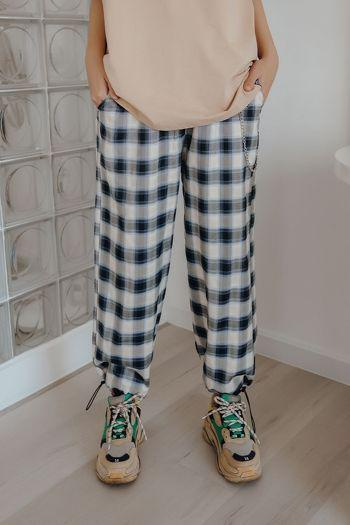
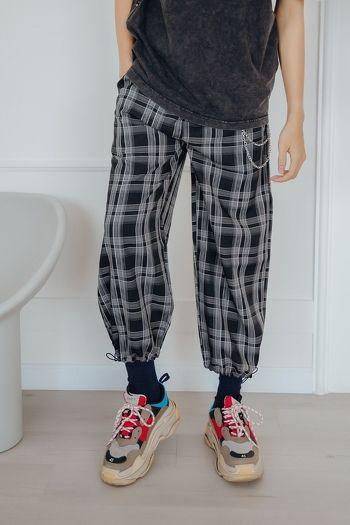
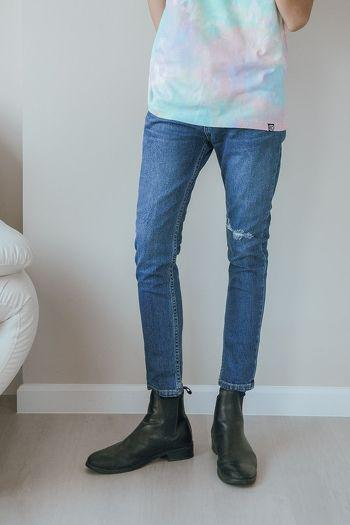
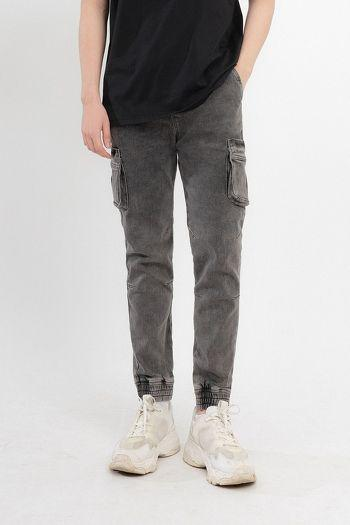
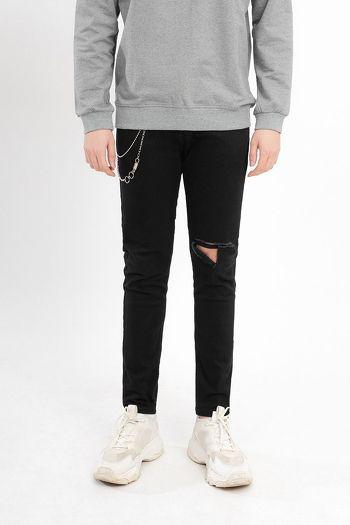
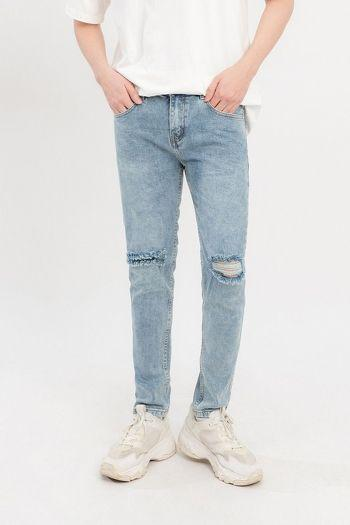
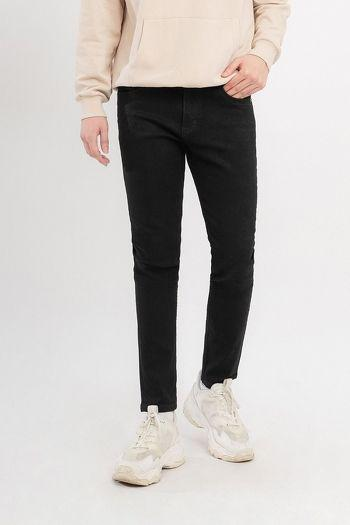
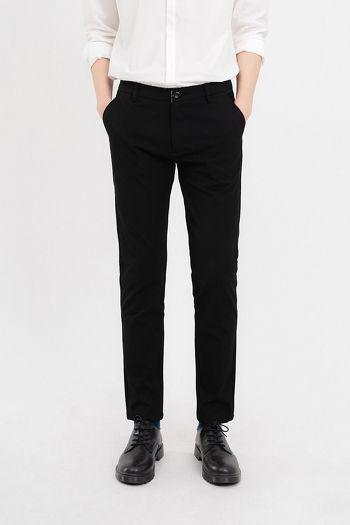
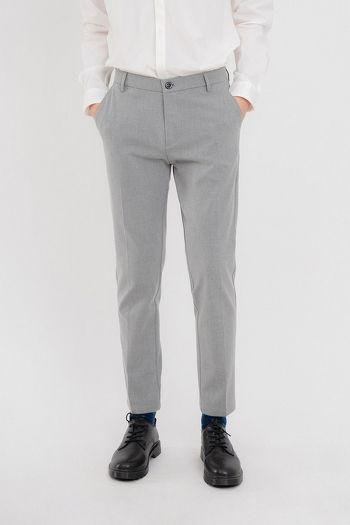
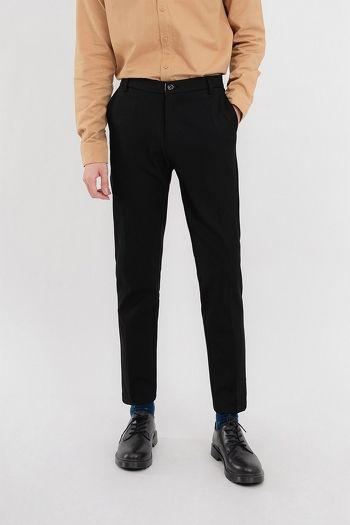
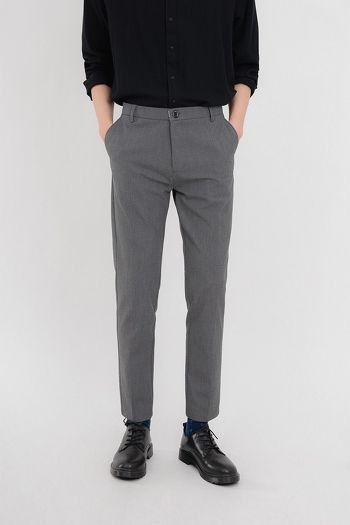
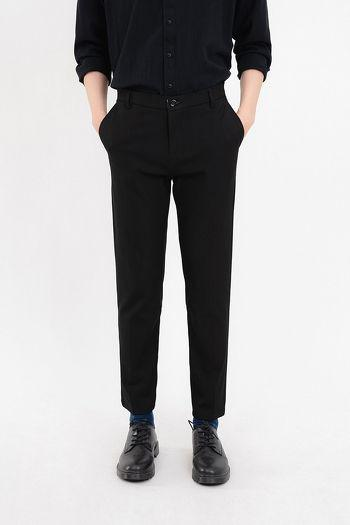
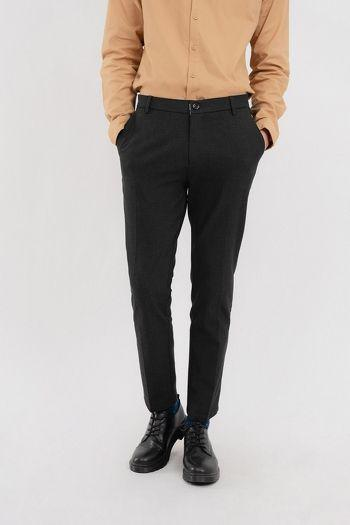
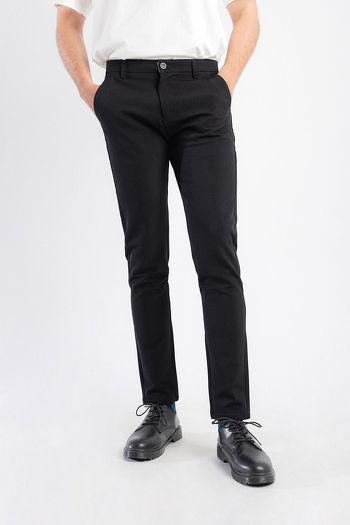
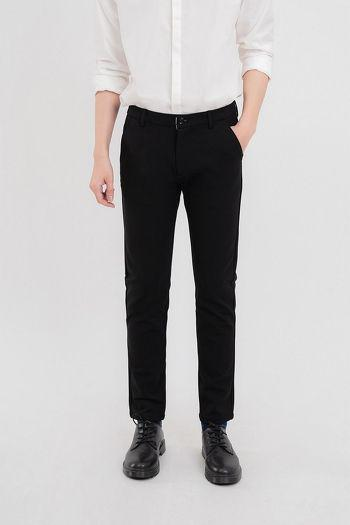
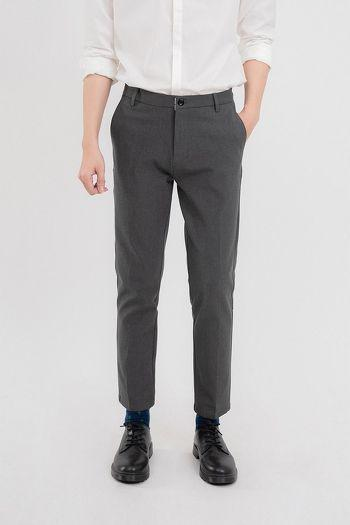
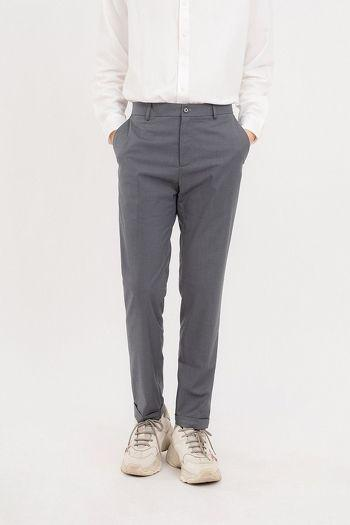
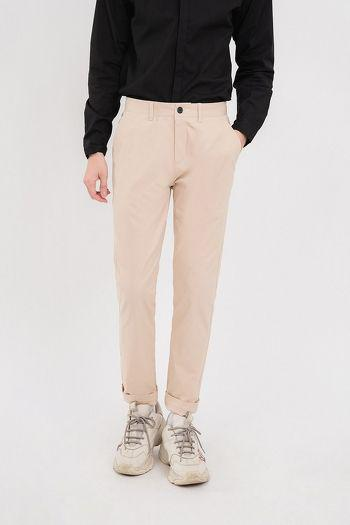
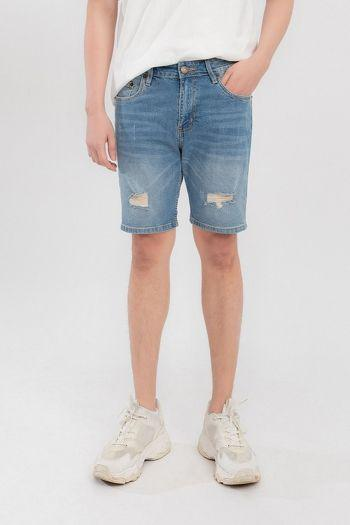
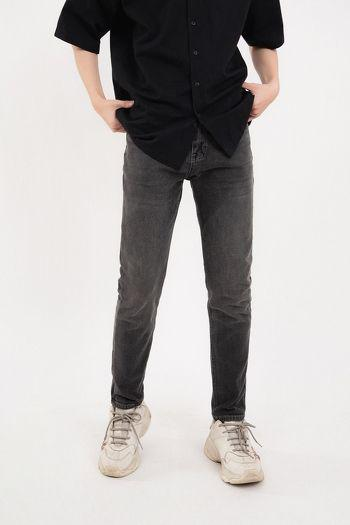
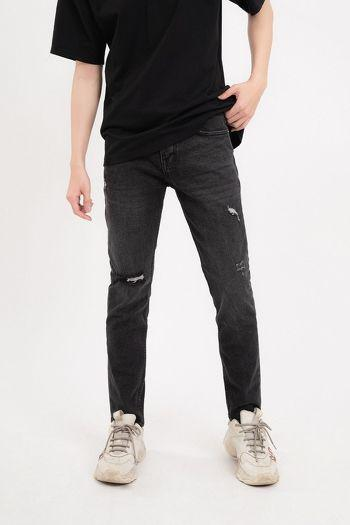
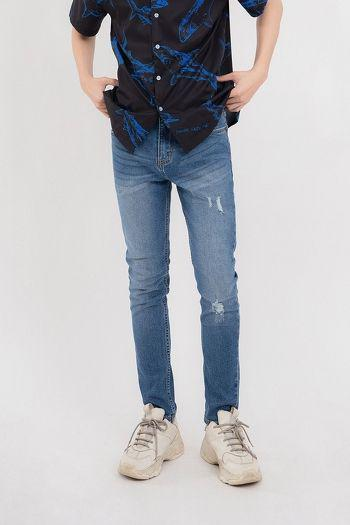
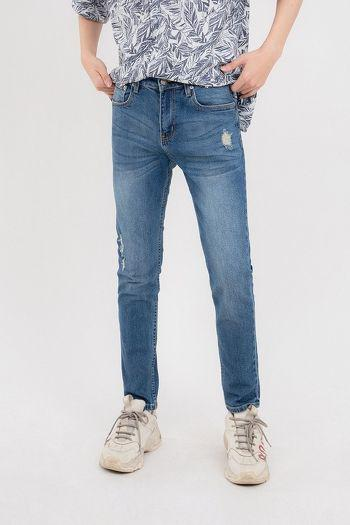

In [ ]:
HTML(data_frame_toto_1[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))

In [ ]:
HTML(data_frame_toto_2[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))

###SHOP ROUTNE


In [ ]:
name_ao_2 = []
name_quan_2 = []
name_loaikhac_2 = []
for i in range(0,50):
  if df2['PhanLoai'][i] ==0:
    n = df2['Name'][i]
    name_ao_2.append(n)
  if df2['PhanLoai'][i] ==1:
    n = df2['Name'][i]
    name_quan_2.append(n)
  if df2['PhanLoai'][i] ==2:
    n = df2['Name'][i]
    name_loaikhac_2.append(n)
print(name_ao_2)
print(name_quan_2)
print(name_loaikhac_2)

['Áo sơ mi tay ngắn có thêu LOOSE form - 10S21SHS010', 'Áo Khoác Chần Bông Cổ VREGULAR - 10F21JAC012', 'Áo Khoác CaroREGULAR - 10F21JAC019', 'Áo Polo  Dệt Kim Tay NgắnSLIMFIT - 10F21POL013', 'Áo sơmi tay dài Pure Linen REGULAR - 10F21SHL001C', 'Áo sơmi tay dài Cotton Lycra SLIM - 10F21SHL004C', 'Áo polo nẹp nút ẩn - 10S21POL024', 'Áo Polo nhãn trang trí FITTED form - 10S21POL026', 'Áo sơ mi tay dài lai cao thấp FITTED form - 10S21SHL004', 'Áo sơ mi tay dài túi trước ngực REGULAR form - 10S21SHL009', 'Áo sơ mi tay dài kẻ sọc REGULAR form - 10S21SHL015', 'Áo sơ mi tay dài rã thân trước REGULAR form - 10S21SHL017', 'Áo sơ mi tay dài Point label OVERSIZE form - 10S21SHL020', 'Áo sơ mi tay ngắn túi ngực trước - 10S21SHS014', 'Áo Sơ Mi Tay Ngắn REGULAR - 10S21SHS034', 'Áo Blazer KhakiRegular - 10F21VES003', 'Áo Blazer Texture FITTED - 10F21VES005', 'Áo Blazer Bobby Texture FITTED - 10F21VES006', 'Áo Hoodie dài tay in hình REGULAR - 10F21HOD005', 'Áo Sơ Mi CordouroyREGULAR - 10F21SHL024', 'Áo

In [ ]:
price_ao_2 = []
price_quan_2 = []
price_loaikhac_2 = []
for i in range(0,50):
  if df2['PhanLoai'][i] ==0:
    n = df2['Price'][i]
    price_ao_2.append(n)
  if df2['PhanLoai'][i] ==1:
    n = df2['Price'][i]
    price_quan_2.append(n)
  if df2['PhanLoai'][i] ==2:
    n = df2['Price'][i]
    price_loaikhac_2.append(n)
print(price_ao_2)
print(price_quan_2)
print(price_loaikhac_2)

[' 480.000₫', ' 850.000₫', ' 850.000₫', ' 480.000₫', ' 550.000₫', ' 430.000₫', ' 450.000₫', ' 380.000₫', ' 420.000₫', ' 520.000₫', ' 420.000₫', ' 450.000₫', ' 450.000₫', ' 420.000₫', ' 450.000₫', ' 1.050.000₫', ' 1.450.000₫', ' 1.450.000₫', ' 650.000₫', ' 550.000₫', ' 350.000₫', ' 420.000₫', ' 450.000₫', ' 295.000₫', ' 290.000₫', ' 1.150.000₫', ' 980.000₫', ' 1.150.000₫', ' 750.000₫', ' 780.000₫', ' 980.000₫', ' 780.000₫', ' 450.000₫', ' 1.250.000₫', ' 1.150.000₫', ' 260.000₫', ' 350.000₫', ' 420.000₫', ' 380.000₫', ' 520.000₫', ' 380.000₫']
[' 312.000₫', ' 550.000₫', ' 480.000₫', ' 450.000₫', ' 480.000₫', ' 480.000₫', ' 420.000₫', ' 480.000₫']
[' 220.000₫']


In [ ]:
image_ao_2 = []
image_quan_2 = []
image_loaikhac_2 = []

for i  in range(0,50) :
  if df2['PhanLoai'][i] == 0:
    i = Image.open(requests.get(df2['Image'][i], stream=True).raw)
    image_ao_2.append(i)
for i  in range(0,50) :
  if df2['PhanLoai'][i] == 1:
    i = Image.open(requests.get(df2['Image'][i], stream=True).raw)
    image_quan_2.append(i)
for i  in range(0,50) :
  if df2['PhanLoai'][i] == 2:
    i = Image.open(requests.get(df2['Image'][i], stream=True).raw)
    image_loaikhac_2.append(i)
print(image_ao_2)
print(image_quan_2)
print(image_loaikhac_2)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F708595D8D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F70871B4390>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F708720D110>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F708821BA50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F70877149D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F70871CC790>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F7088246A50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F70871CC090>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F70871CCE10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F708720DB50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F70871CC810>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x690 at 0x7F708720BB50>, <PI

In [ ]:
ds_ao_2 = {
    'name': name_ao_2,
    'image': image_ao_2,
    'price' : price_ao_2 
}
data_frame_routine = pd.DataFrame(ds_ao_2)
display(data_frame_routine)

name  ...        price
0   Áo sơ mi tay ngắn có thêu LOOSE form - 10S21SH...  ...     480.000₫
1        Áo Khoác Chần Bông Cổ VREGULAR - 10F21JAC012  ...     850.000₫
2                  Áo Khoác CaroREGULAR - 10F21JAC019  ...     850.000₫
3      Áo Polo  Dệt Kim Tay NgắnSLIMFIT - 10F21POL013  ...     480.000₫
4   Áo sơmi tay dài Pure Linen REGULAR - 10F21SHL001C  ...     550.000₫
5    Áo sơmi tay dài Cotton Lycra SLIM - 10F21SHL004C  ...     430.000₫
6                    Áo polo nẹp nút ẩn - 10S21POL024  ...     450.000₫
7    Áo Polo nhãn trang trí FITTED form - 10S21POL026  ...     380.000₫
8   Áo sơ mi tay dài lai cao thấp FITTED form - 10...  ...     420.000₫
9   Áo sơ mi tay dài túi trước ngực REGULAR form -...  ...     520.000₫
10  Áo sơ mi tay dài kẻ sọc REGULAR form - 10S21SH...  ...     420.000₫
11  Áo sơ mi tay dài rã thân trước REGULAR form - ...  ...     450.000₫
12  Áo sơ mi tay dài Point label OVERSIZE form - 1...  ...     450.000₫
13     Áo sơ mi tay ngắn túi ngực trước - 10S21SHS014  ...     420.000₫
14            Áo Sơ Mi Tay Ngắn REGULAR - 10S21SHS034  ...     450.000₫
15               Áo Blazer KhakiRegular - 10F21VES003  ...   1.050.000₫
16             Áo Blazer Texture FITTED - 10F21VES005  ...   1.450.000₫
17       Áo Blazer Bobby Texture FITTED - 10F21VES006  ...   1.450.000₫
18    Áo Hoodie dài tay in hình REGULAR - 10F21HOD005  ...     650.000₫
19            Áo Sơ Mi CordouroyREGULAR - 10F21SHL024  ...     550.000₫
20  Áo thun tay dài xẻ tà nhãn trang trí FITTED - ...  ...     350.000₫
21  Áo Polo kẻ sọc thân trước FITTED form - 10S21P...  ...     420.000₫
22     Áo Polo ngắn tay thêu hoa FITTED - 10F21POL039  ...     450.000₫
23     Áo thun tay ngắn thêu hoa FITTED - 10F21TSS033  ...     295.000₫
24    Áo thun ngắn tay phối màu REGULAR - 10S21TSH021  ...     290.000₫
25  Áo Khoác Bomber Quilting Tay CongRegular - 10F...  ...   1.150.000₫
26         Áo Khoác Bomber DobbyREGULAR - 10F21JAC018  ...     980.000₫
27            Áo khoác CordouroyREGULAR - 10F21JAC022  ...   1.150.000₫
28  Áo Khoác Dệt Kim Twill TextureREGULAR - 10F21J...  ...     750.000₫
29        Áo Khoác Bomber Da LộnREGULAR - 10F21JAC008  ...     780.000₫
30        Áo Khoác Bomber Da LộnREGULAR - 10F21JAC011  ...     980.000₫
31            Áo Khoác Thêu HìnhREGULAR - 10F21JAC021  ...     780.000₫
32             Áo Polo ngắn tay FITTED - 10F21POL001C  ...     450.000₫
33        Áo Blazer Knit Texture FITTED - 10F21VES001  ...   1.250.000₫
34         Áo Khoác Bomber KhakiREGULAR - 10F21JAC009  ...   1.150.000₫
35  Áo thun ngắn tay hình in mùa covid FITTED - 10...  ...     260.000₫
36           Áo Polo basic FITTED form - 10S21POL001C  ...     350.000₫
37   Áo Polo phối rã in sọc FITTED form - 10S21POL003  ...     420.000₫
38           Áo polo vải gân LOOSE form - 10S21POL013  ...     380.000₫
39  Áo sơ mi dài tay pure linen REGULAR form - 10S...  ...     520.000₫
40  Áo sơ mi tay ngắn cổ POINT COLLAR LOOSE form -...  ...     380.000₫

[41 rows x 3 columns]

In [ ]:
ds_quan_2 = {
    'name': name_quan_2,
    'image': image_quan_2,
    'price' : price_quan_2 
}
data_frame_routine_1 = pd.DataFrame(ds_quan_2)
display(data_frame_routine_1)

name  ...      price
0        Quần Jean trơn SLIM FIT  - 10F20DPA076R1  ...   312.000₫
1  Quần Kaki ống rộng WIDE LEG form - 10S21PCA007  ...   550.000₫
2       Quần short Linen LOOSE form - 10S21PSH028  ...   480.000₫
3              Quần dài Kakhi SLIM - 10F21PCA001C  ...   450.000₫
4          Quần jean trơn SLIM form - 10S21DPA019  ...   480.000₫
5         QUẦN JEAN TRƠN SLIM CROP  - 10S21DPA052  ...   480.000₫
6       Quần Shorts Khaki DobbySLIM - 10F21PSH011  ...   420.000₫
7            Quần Dài KhakiSLIMCROP - 10F21PCA018  ...   480.000₫

[8 rows x 3 columns]

In [ ]:
ds_loaikhac_2 = {
    'name': name_loaikhac_2,
    'image': image_loaikhac_2,
    'price' : price_loaikhac_2 
}
data_frame_routine_2 = pd.DataFrame(ds_loaikhac_2)
display(data_frame_routine_2)

name  ...      price
0  Nón Kaki nam Bucket hai mặt FREESIZE form - 10...  ...   220.000₫

[1 rows x 3 columns]


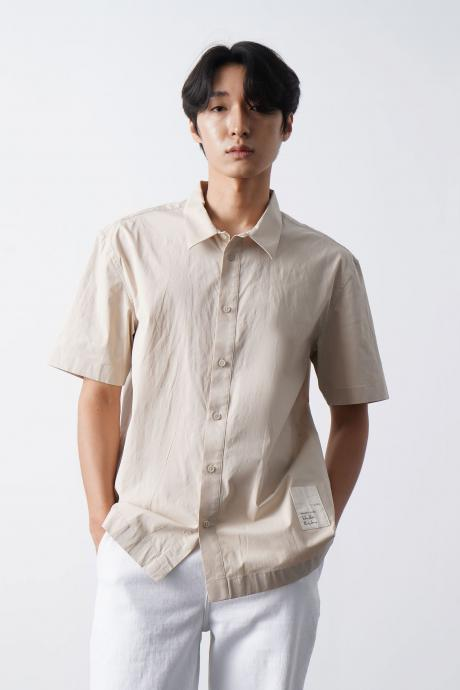
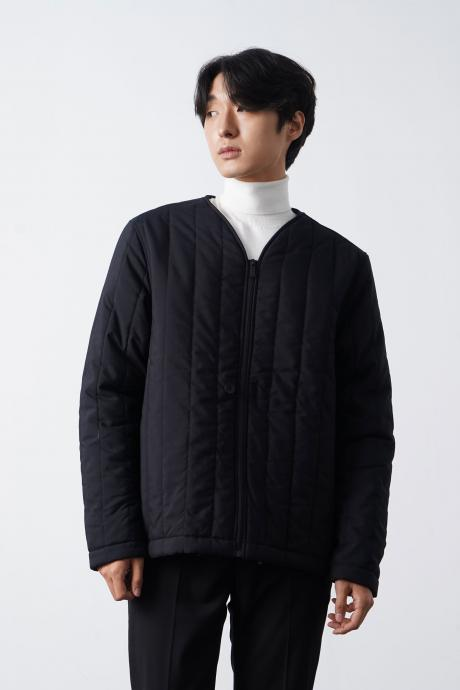
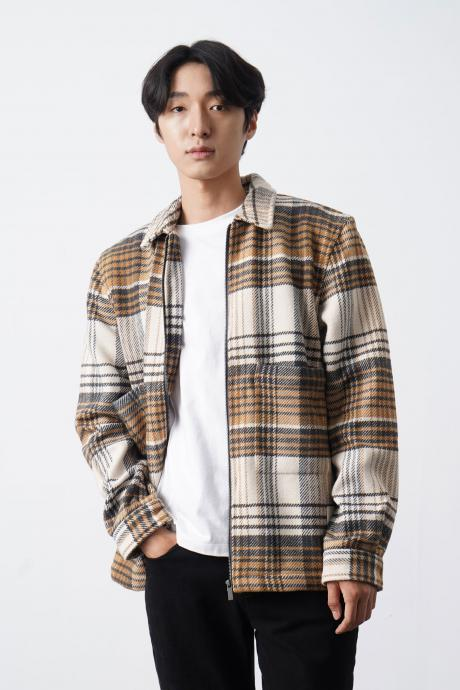
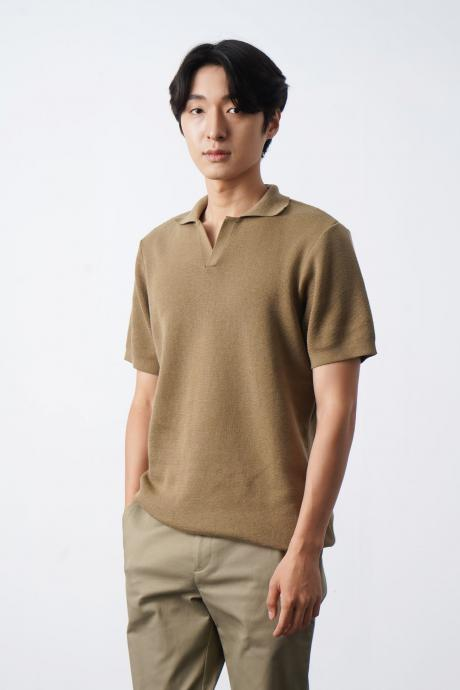
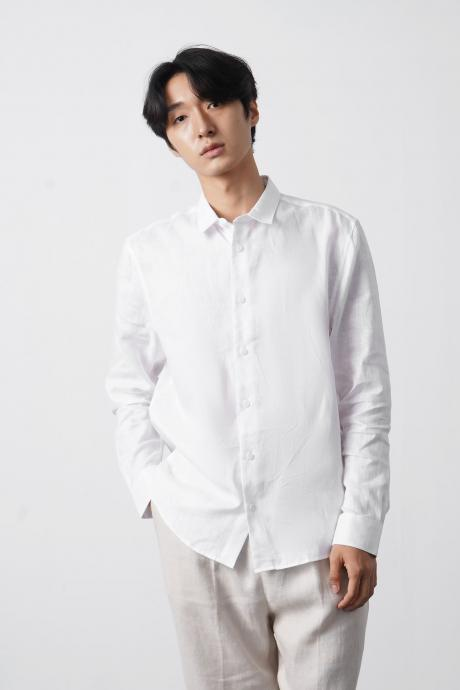
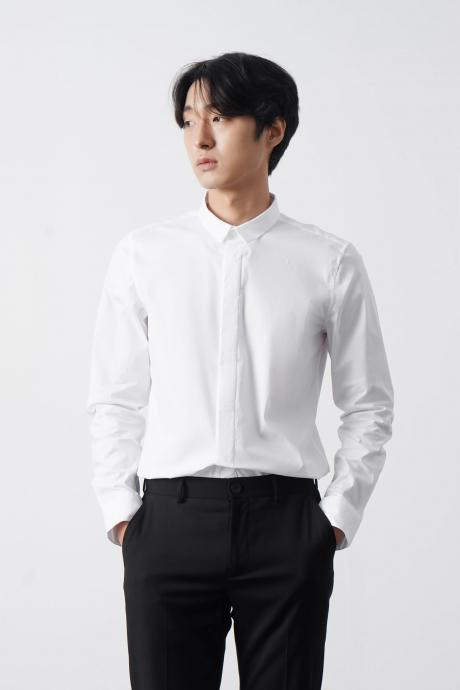
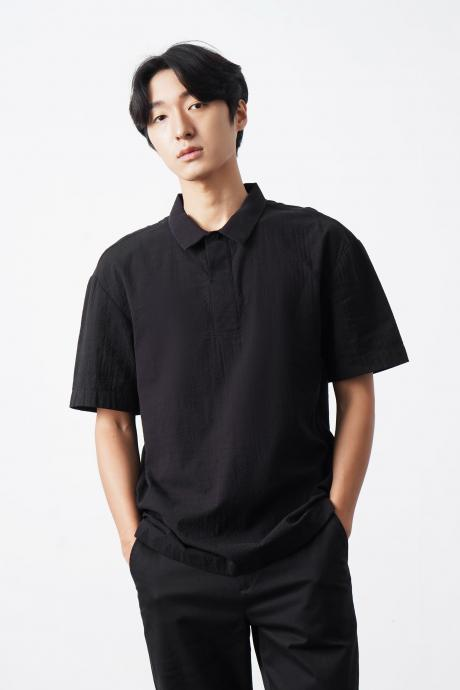
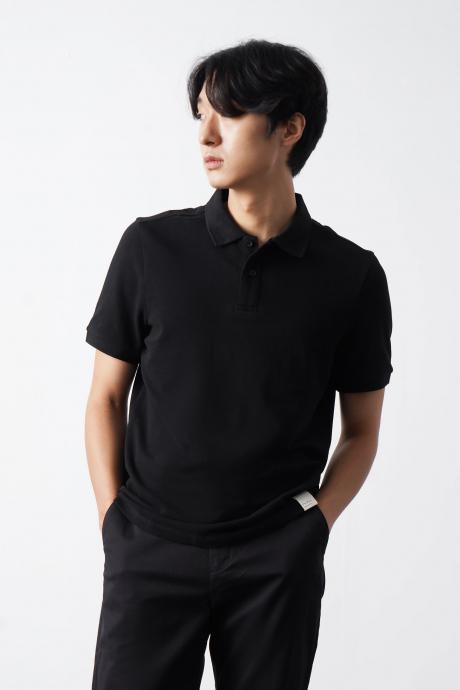
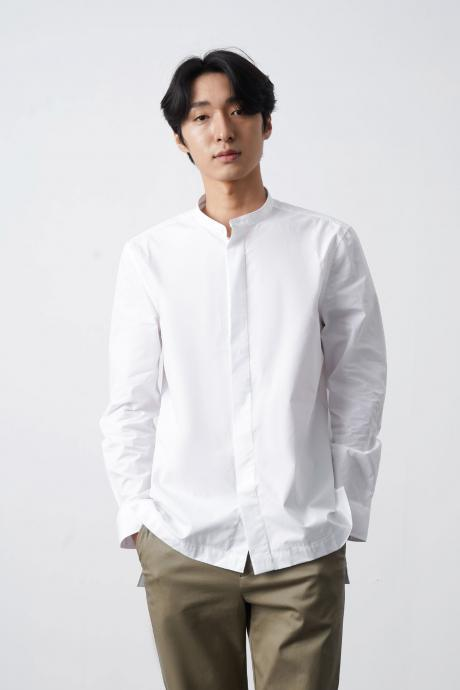
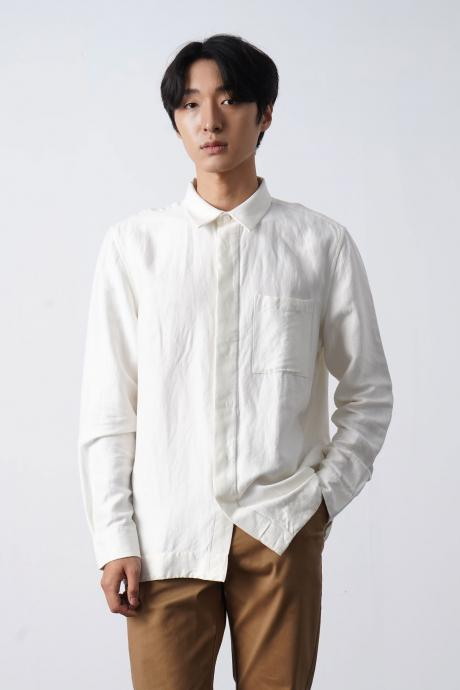
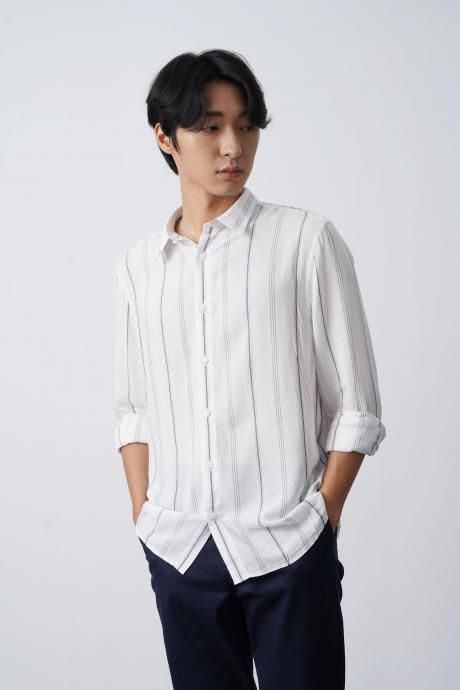
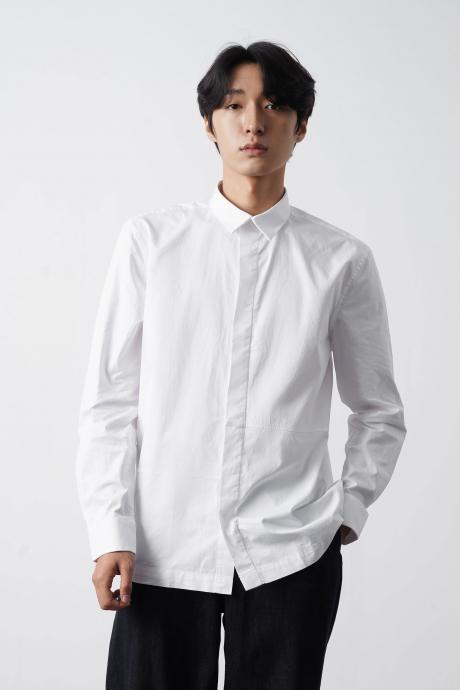
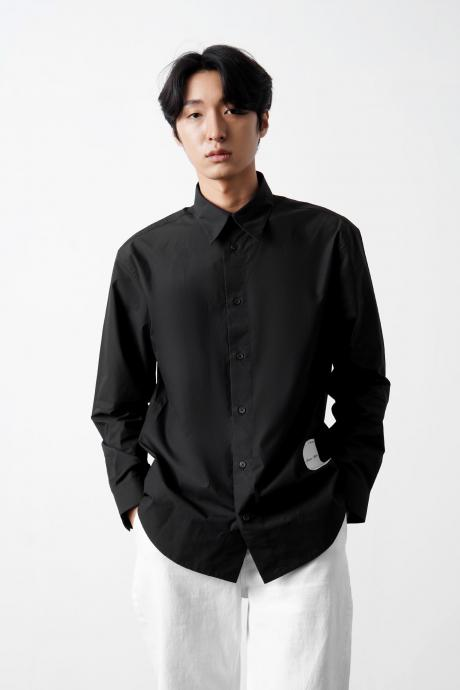
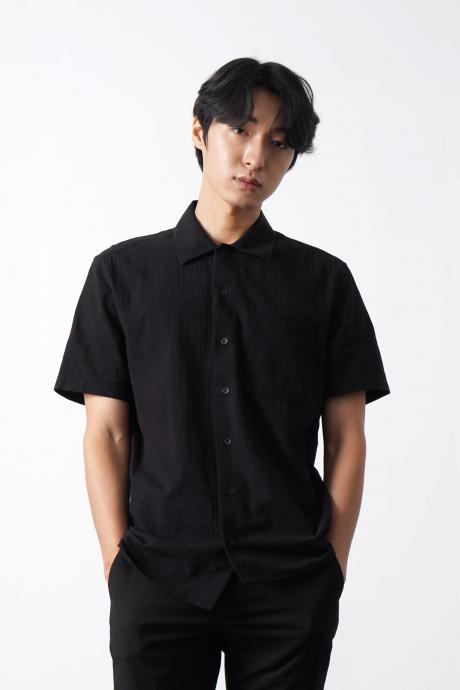
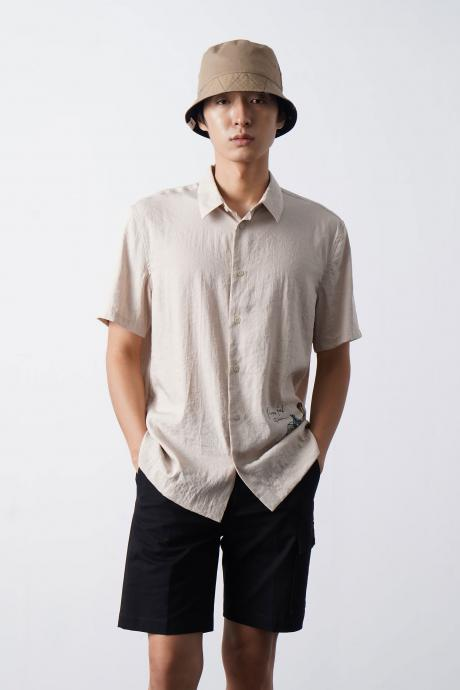
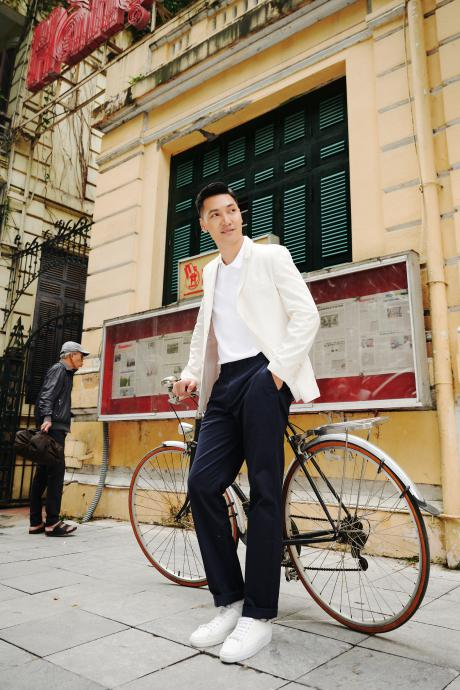
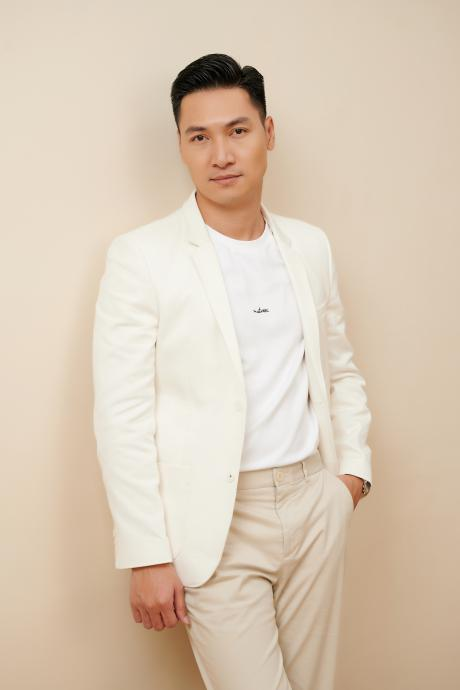
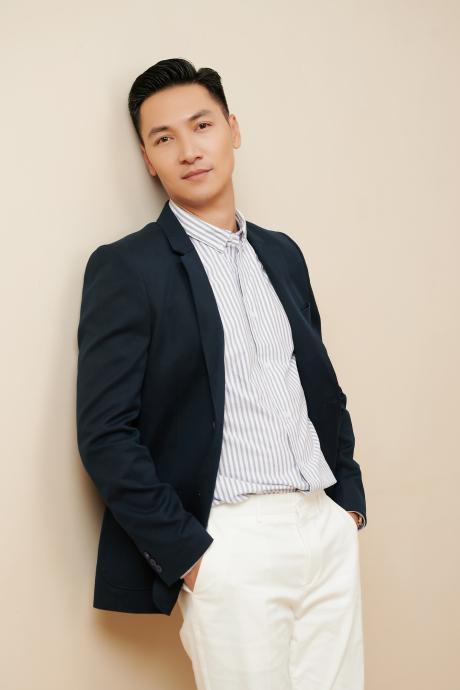
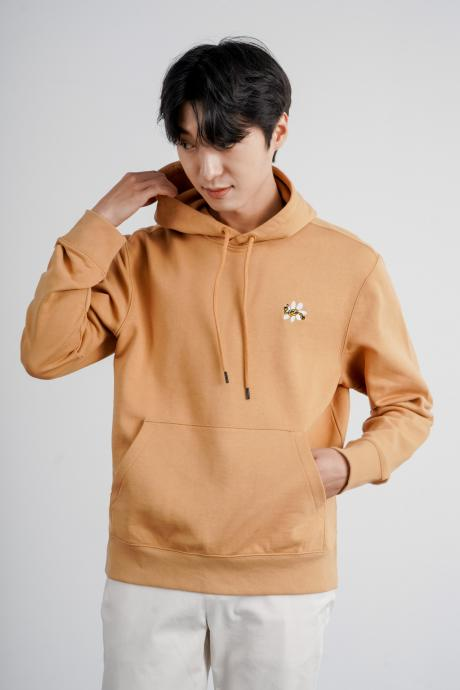
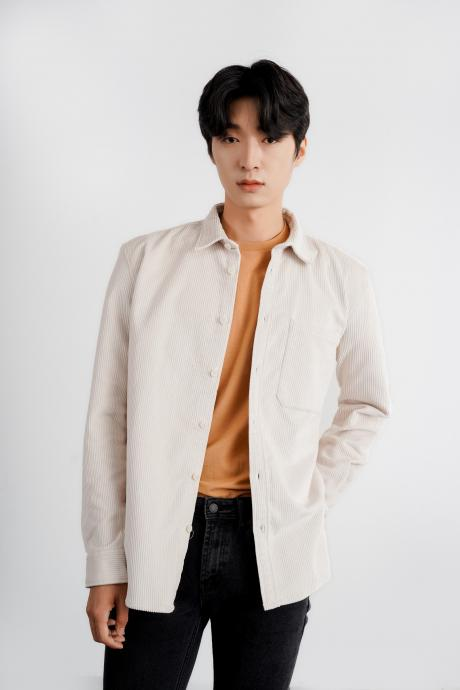
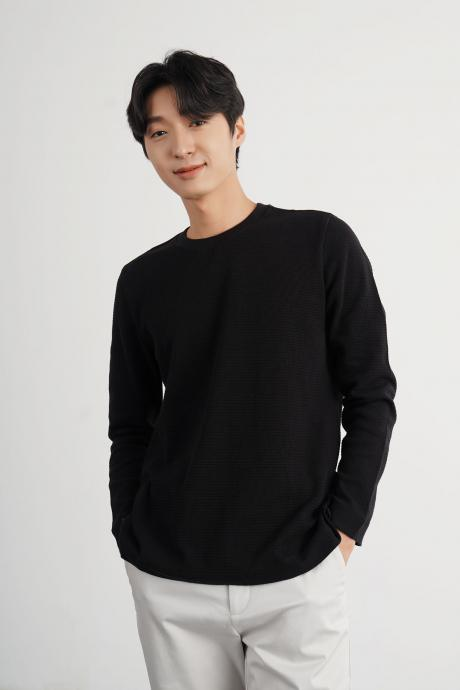
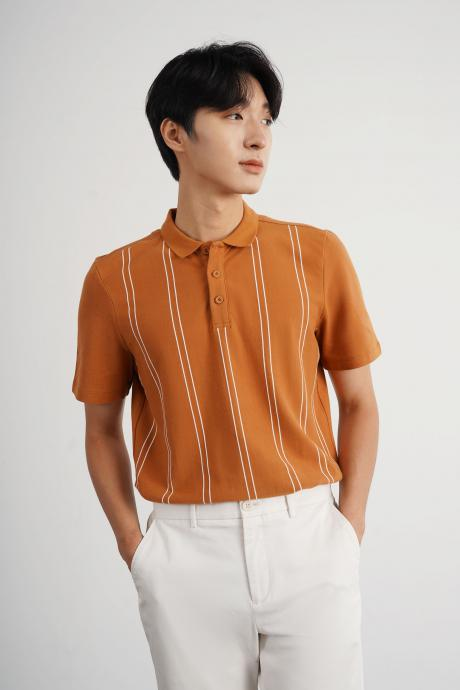
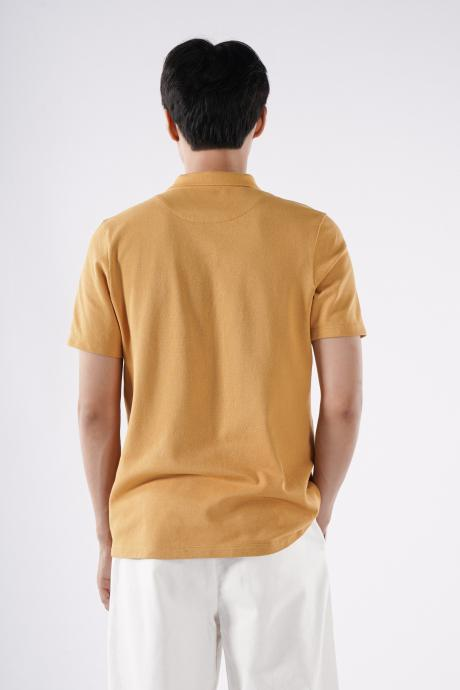
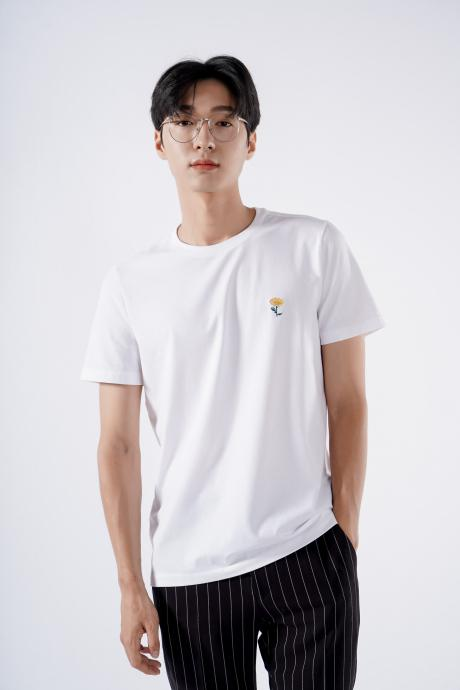
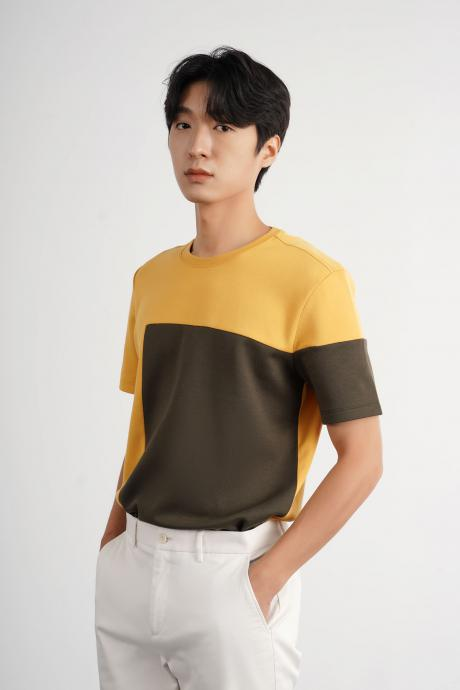
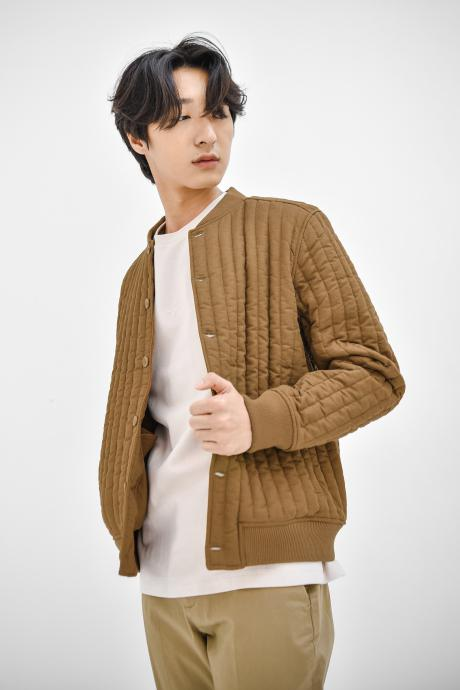
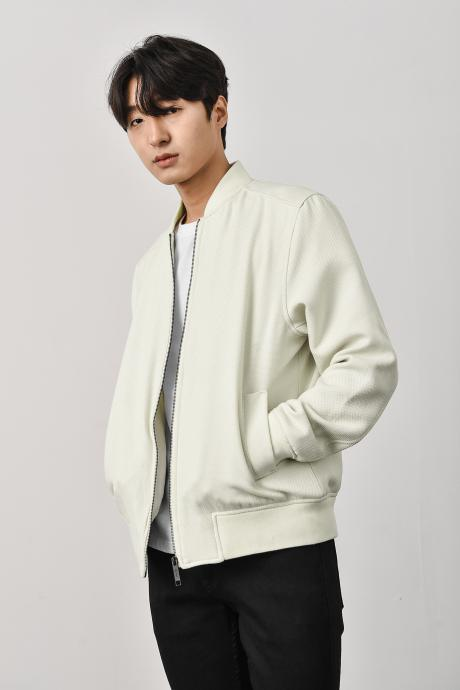
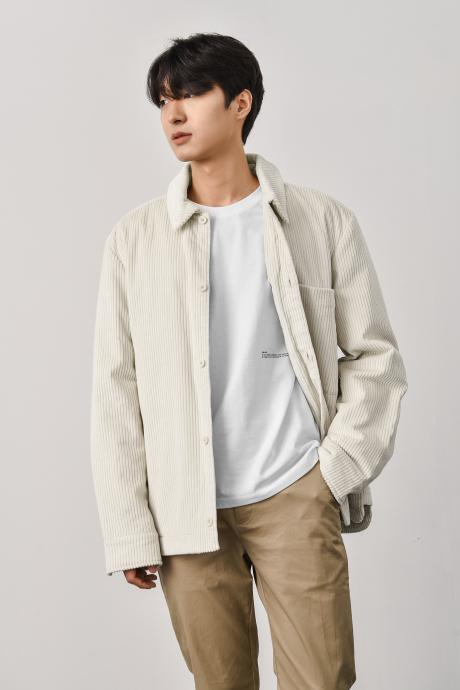
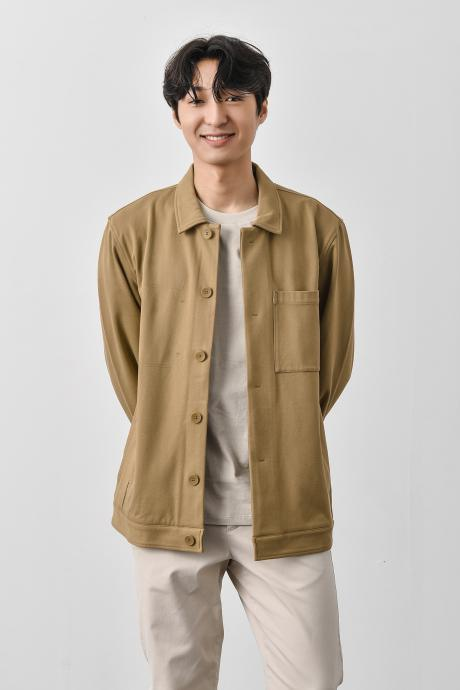
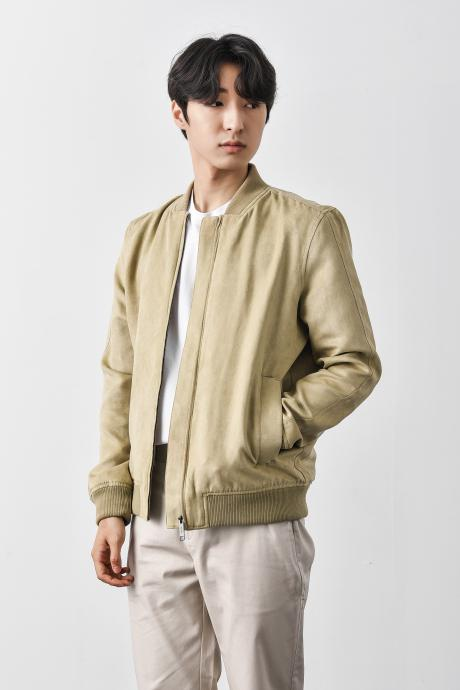
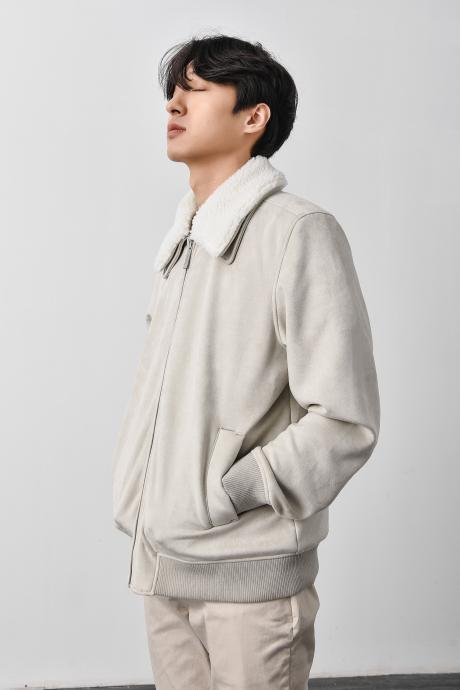
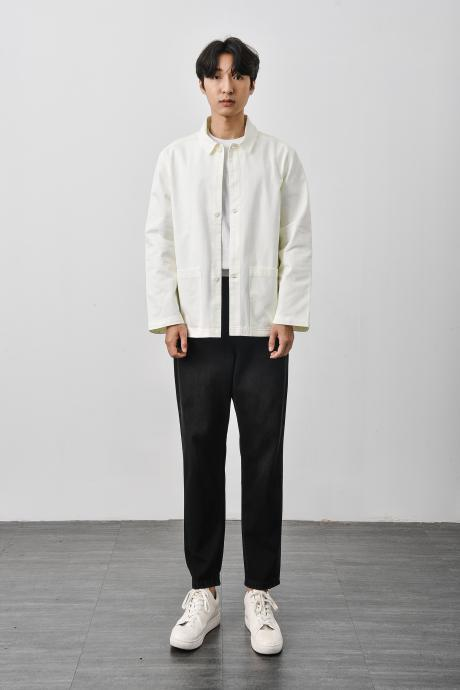
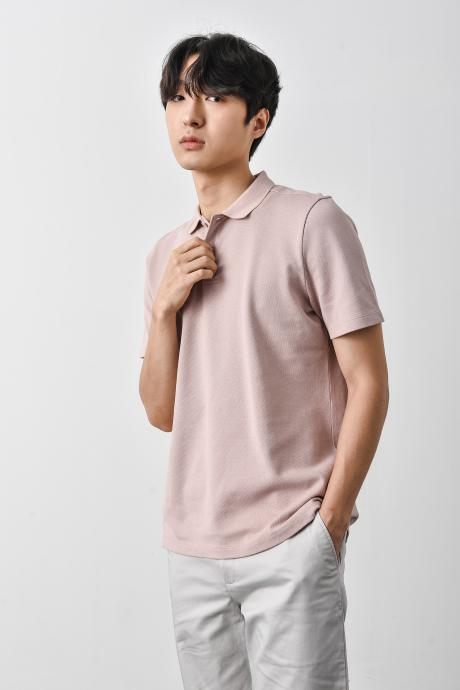
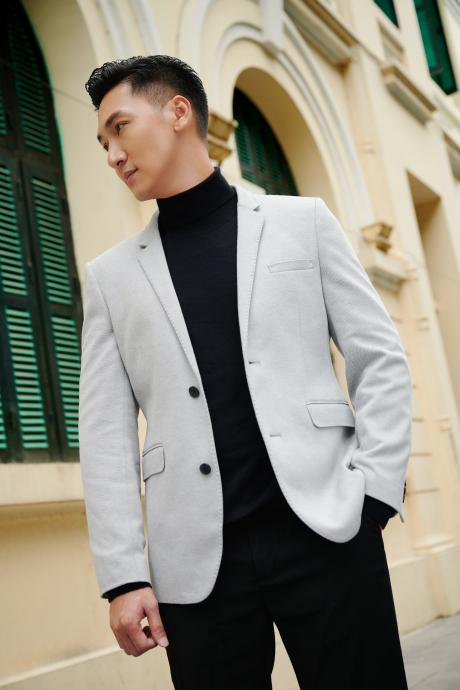
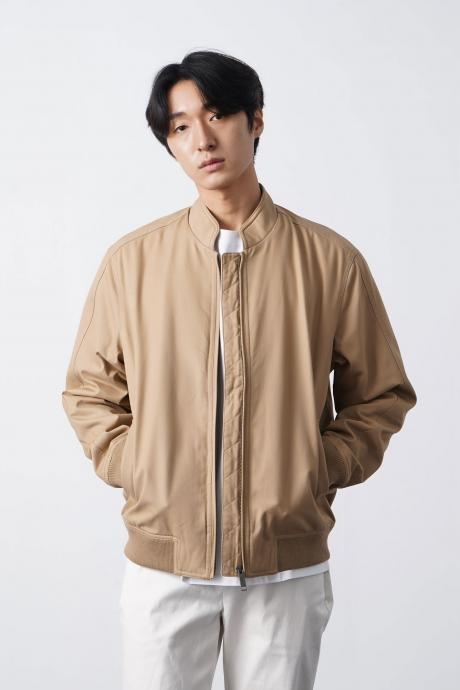
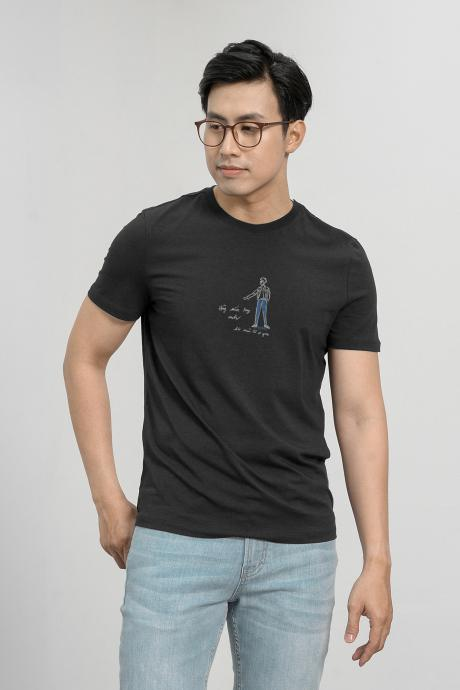
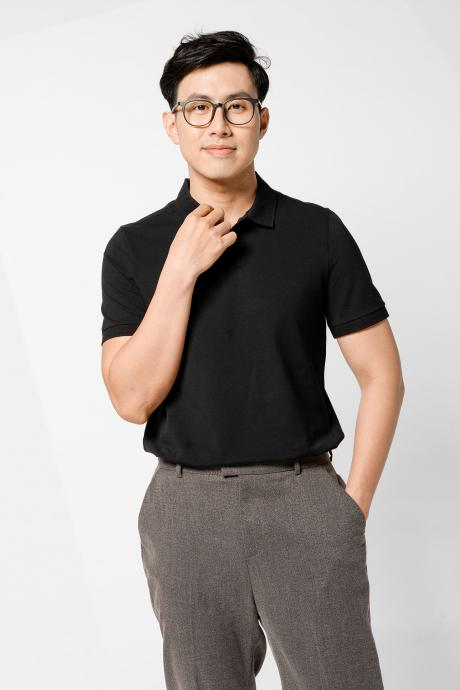
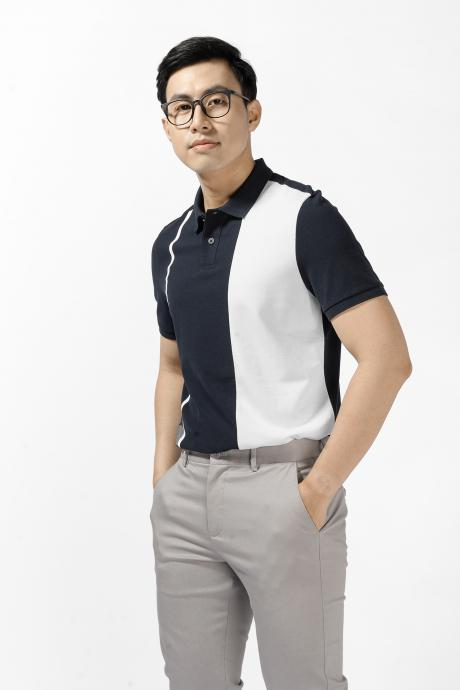
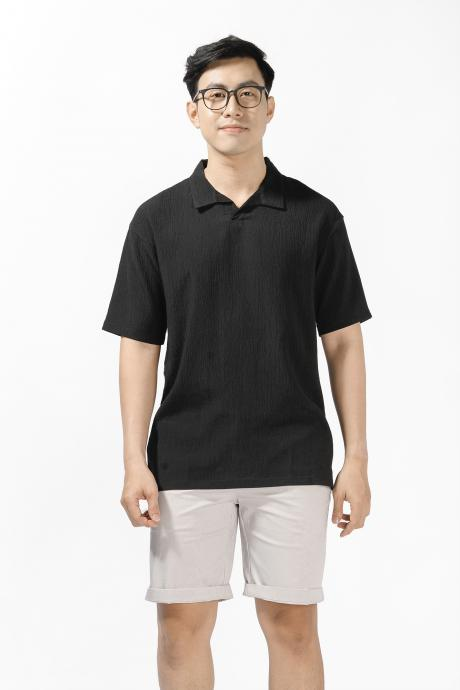
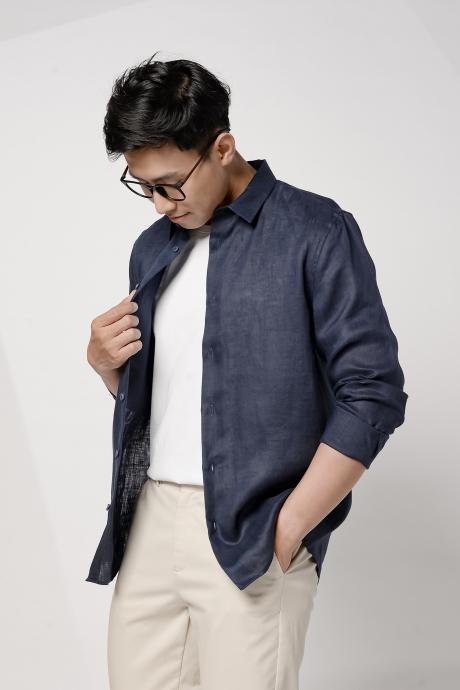
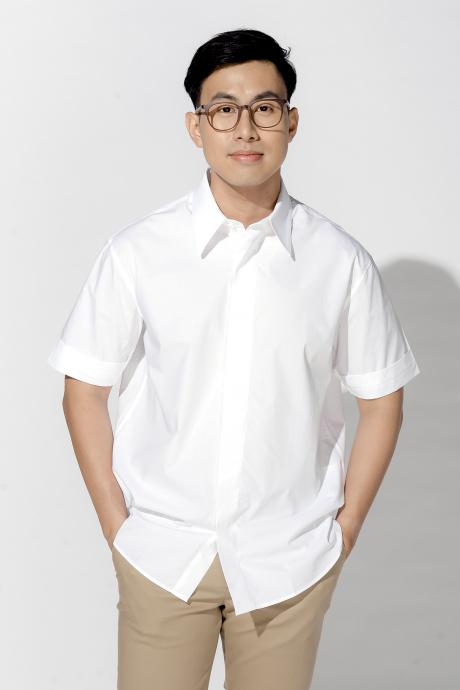

In [ ]:
HTML(data_frame_routine[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))


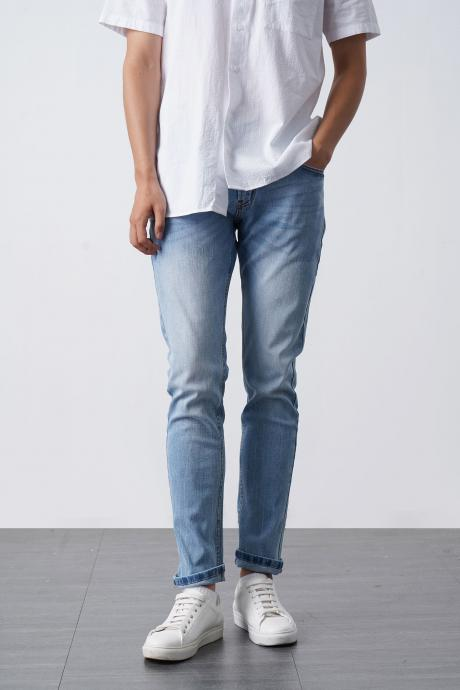
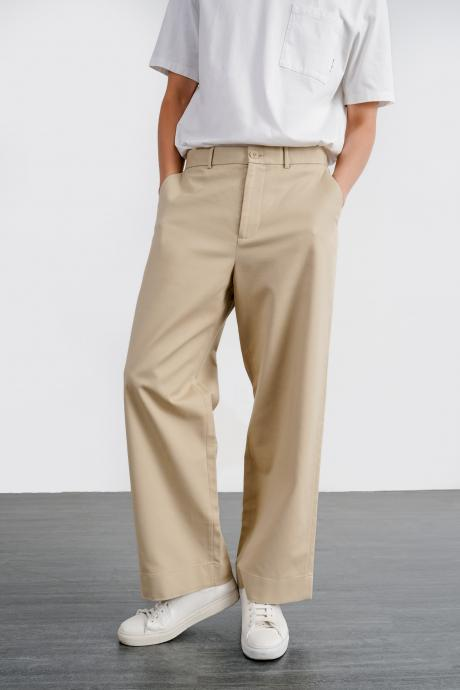
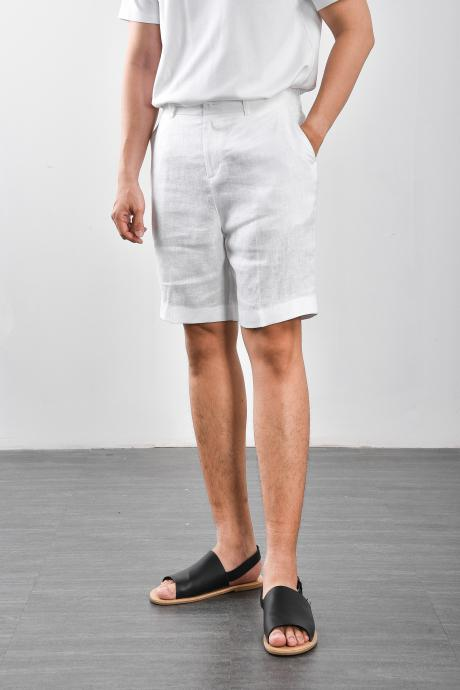
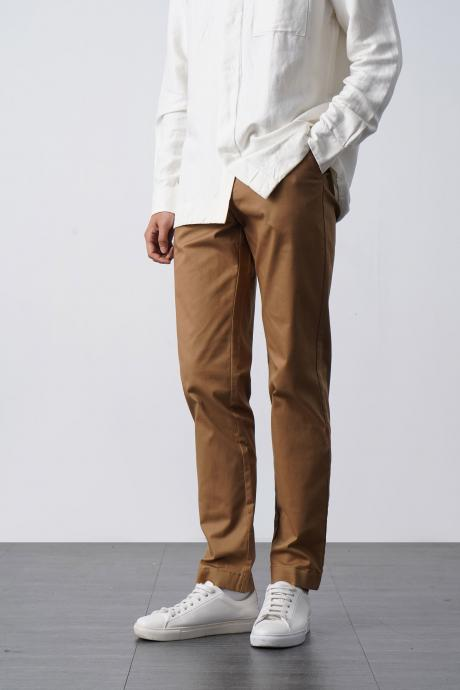
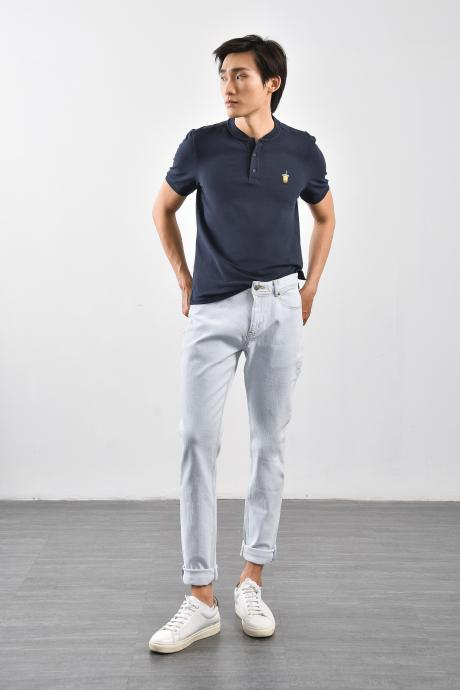
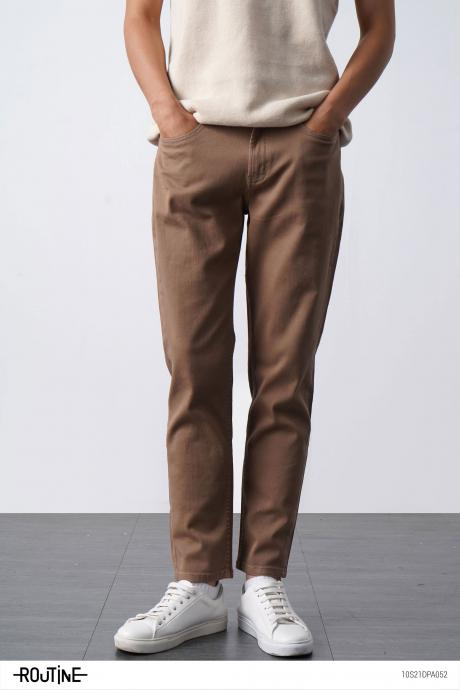
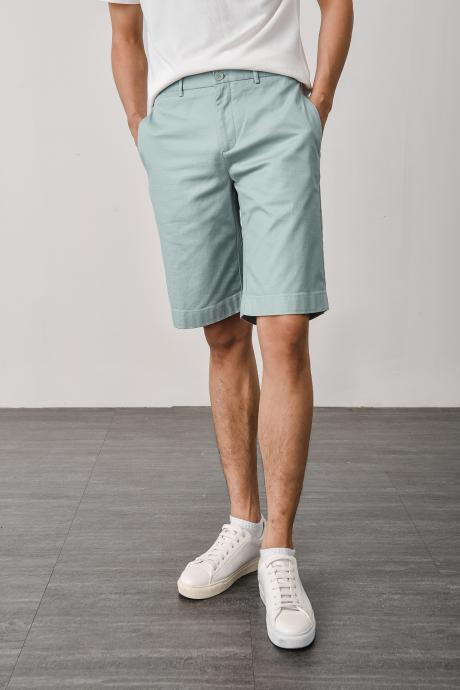
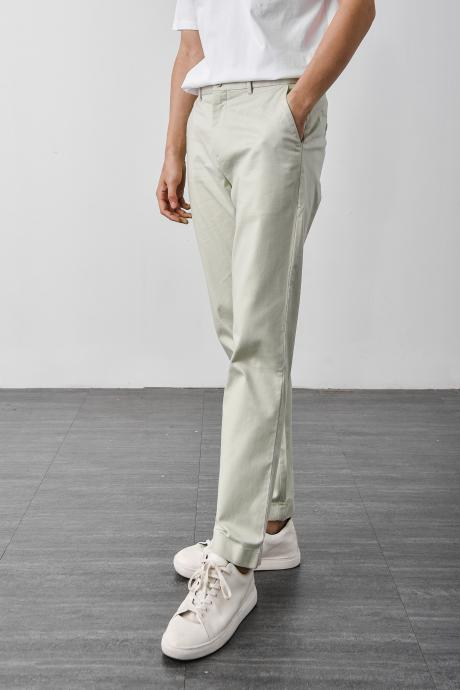

In [ ]:
HTML(data_frame_routine_1[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))


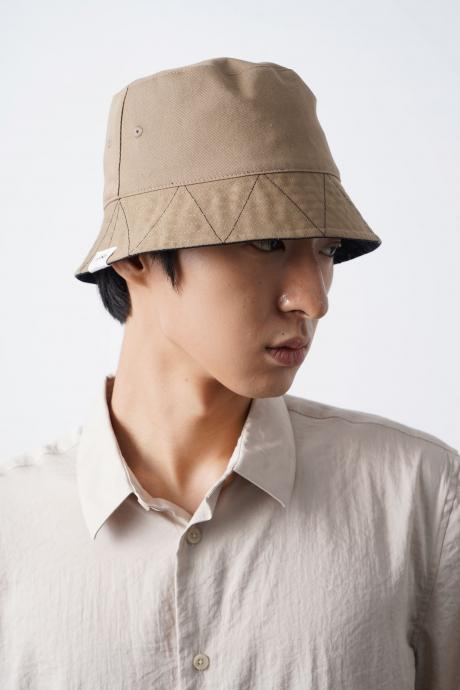

In [ ]:
HTML(data_frame_routine_2[['name', 'image','price']].to_html(formatters={'image': image_formatter}, escape=False))